## Import Tools

In [1]:
import urllib
url = "https://raw.githubusercontent.com/Jwizzed/ml-journey/main/TTCV.py"
urllib.request.urlretrieve(url, "TTCV.py")
import TTCV

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models
import os
import TTCV
import seaborn as sns

In [5]:
TTCV.info()

+-----------------------+----------------------------------------------------------+
| Function              | Description                                              |
+=======================+==========================================================+
| report_dir            | Walks through dir_path returning its contents            |
+-----------------------+----------------------------------------------------------+
| unzip                 | Unzips a file                                            |
+-----------------------+----------------------------------------------------------+
| get_lines             | Read the contents of the file and return them as a list  |
+-----------------------+----------------------------------------------------------+
| view_random_image     | Visualize the difference in shape between two DataFrames |
+-----------------------+----------------------------------------------------------+
| get_train_time        | Gets difference between start and end t

In [6]:
np.random.seed(224)
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Get a data

In [7]:
!kaggle competitions download -c dog-breed-identification

100%|████████████████████████████████████████| 691M/691M [00:38<00:00, 14.3MB/s]
100%|████████████████████████████████████████| 691M/691M [00:38<00:00, 18.9MB/s]


In [8]:
!unzip dog-breed-identification.zip
!rm dog-breed-identification.zip

Archive:  dog-breed-identification.zip
  inflating: labels.csv              
  inflating: sample_submission.csv   
  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  
  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  
  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  
  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  
  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  
  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  
  inflating: test/004476c96f575879af4af471af65cae8.jpg  
  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  
  inflating: test/00496f65de6cc319145ce97bd6e90360.jpg  
  inflating: test/004bf14426d1

  inflating: test/03be4f5a87ec964230a128664c67ca92.jpg  
  inflating: test/03c10d7392570e61b4ca96dab7808b33.jpg  
  inflating: test/03cd468831ad32cd337a73a7bde9dafa.jpg  
  inflating: test/03d495a97c75d45a069d5b86af52197f.jpg  
  inflating: test/03f3173218d97d4e386d2daf76622ffe.jpg  
  inflating: test/03f71314095db3cb0baadd1a4123ace5.jpg  
  inflating: test/04042019929218a5d9ba73e4e568f397.jpg  
  inflating: test/0415a2754ad5177df59e62a461604c14.jpg  
  inflating: test/041cf5964ef88d5a9bc2484c2fb35e19.jpg  
  inflating: test/042bfeb459b50977f590a341dfb20c93.jpg  
  inflating: test/04378b6550e324c2edfe51a23ed2f2ee.jpg  
  inflating: test/0441fda84f1eab8ddc72a8262a66e626.jpg  
  inflating: test/0448e6bdef9a5b0e3748028a76c4dfb0.jpg  
  inflating: test/04495ca69f279d9b2c38af99670dbb56.jpg  
  inflating: test/044b55c0f3ddceb089854c891c1fc01b.jpg  
  inflating: test/0457c8590e1ade1797e9896346e8815f.jpg  
  inflating: test/045e084e6ca9f5af87fb0f033670621c.jpg  
  inflating: test/045e64275a84a

  inflating: test/0890c992ea2d00c3c2de9e588081a3b9.jpg  
  inflating: test/089347d3bc5f6b4a4a7d38d10c8f5d90.jpg  
  inflating: test/08b34271d7d196d13bbeeea99504e099.jpg  
  inflating: test/08c1a66912af795920a43e563acfe5aa.jpg  
  inflating: test/08d5f16507943be640f4592c9d08a798.jpg  
  inflating: test/08db69ad154c401de7951c11a15ebf26.jpg  
  inflating: test/08db8163ff5451ae44b7496b5c9ee05a.jpg  
  inflating: test/08dc47beafdfdc5702dbf168c7eb3456.jpg  
  inflating: test/08f4ff17cc6bf754d798eb3b39fafebe.jpg  
  inflating: test/08f5846ac17ac1b421305a4cc82c6824.jpg  
  inflating: test/08ffbdb8c2abc705348260533f3a0659.jpg  
  inflating: test/090179e04f4d8bf313d0fc97c1879b3f.jpg  
  inflating: test/0910c194c44f79721d282c8416016dab.jpg  
  inflating: test/0917cea14ed14bb43c7ca5ead4f38266.jpg  
  inflating: test/092376c380c9d09c4af6e98ef2278925.jpg  
  inflating: test/0925832e4d19da79b186f1fc89d59229.jpg  
  inflating: test/092b3603e559d05e09e226b56bf5f788.jpg  
  inflating: test/093429fa37359

  inflating: test/0e1ea29028a5b914632b0c30ecf4d3ee.jpg  
  inflating: test/0e22117d085da91cba31ad4cc3bf0403.jpg  
  inflating: test/0e2f282cd63cb0f4798678a2e658e910.jpg  
  inflating: test/0e38176c43c4bfc1db5433fe4d607f1e.jpg  
  inflating: test/0e39ccd1021cefe374b0e38fd35b4356.jpg  
  inflating: test/0e40ecbb196cf0d7d325a10c32400999.jpg  
  inflating: test/0e4b38eb8de2969f87b0f224dfae2af1.jpg  
  inflating: test/0e4c14d014ad3e0421933ab29ad7b16c.jpg  
  inflating: test/0e4edb98eae12cd4332ff2e2d2c6f1c4.jpg  
  inflating: test/0e5df48c6a720cdce7bfcd8064e86f88.jpg  
  inflating: test/0e5e614226a9f90dadc315bfba52458f.jpg  
  inflating: test/0e5f1ea483aacbd4d42209b1fc69b056.jpg  
  inflating: test/0e6885657425d9f98f77422d4a91893d.jpg  
  inflating: test/0e6e4329b4f6d74e3225bbf3bb027473.jpg  
  inflating: test/0e78b2e7c587a7f503fcfd5be25c23c0.jpg  
  inflating: test/0e7baab11c3e1a71d364720ff43aa5b4.jpg  
  inflating: test/0e7c2ef54e84c8d021e1c0ea96cad523.jpg  
  inflating: test/0e7c7475259b9

  inflating: test/135bd15fefabe5b16f8c93be850fc36e.jpg  
  inflating: test/13649222b59612a699a235551fcd3fdc.jpg  
  inflating: test/13671c9ee26df3edcaff33d43c16e9bc.jpg  
  inflating: test/136c4388809b3854c866a81a85bcc4ca.jpg  
  inflating: test/136c9656679fd881443a2c83f81696df.jpg  
  inflating: test/13733ca862e8b3881e35f1bf1a02a8ce.jpg  
  inflating: test/13802b88269d75c9bda1c8a2489abc5c.jpg  
  inflating: test/1381912fe152f7873af101cf0d51bbaf.jpg  
  inflating: test/13837b605ad3176d3114c5f6bd6a653c.jpg  
  inflating: test/138698f34f99fb04361bbcf222235bc6.jpg  
  inflating: test/138a5ce524f0ef30818208492eb169e3.jpg  
  inflating: test/138aaaa3ad8bdee8167bda4ba8dd3875.jpg  
  inflating: test/139431b6f6bffc551bf88f65d2e4d170.jpg  
  inflating: test/1397ba1a338af3502945e1beec7efabf.jpg  
  inflating: test/13992bae26f099e9b8df55860b8acda6.jpg  
  inflating: test/13a381ae2724b106211dc638931b43c0.jpg  
  inflating: test/13ac212ccfb9ab1b85bf2aa5da2a96bb.jpg  
  inflating: test/13ae7a8703585

  inflating: test/18d344e127337b8acc18e7dfd84b49f8.jpg  
  inflating: test/18dba93ad1e08a88aa83c3c8d58a5429.jpg  
  inflating: test/18dc6ac1728bfc0ce7de1cbcc09f83f4.jpg  
  inflating: test/18f330c68ce2bdf7291b10baa3561e63.jpg  
  inflating: test/190358569b334640fd9c1cbe0638027c.jpg  
  inflating: test/1915deb4da9b429c5a2e478f787402c1.jpg  
  inflating: test/19166d749759a4089e1f5de14a39d8b1.jpg  
  inflating: test/1919a4618a2887e2549c9d4df2b2c61e.jpg  
  inflating: test/191acdbc92d6643220bdc61f2dcec643.jpg  
  inflating: test/191efcb36c7dc501ce72999a6a64a173.jpg  
  inflating: test/191f5b6e24e8840c3d63e34af1bf2d14.jpg  
  inflating: test/19229109053a458524736665c38e7042.jpg  
  inflating: test/19263b69f8be8b1cb21f6c8f69f0957a.jpg  
  inflating: test/1929a4008c9672f934e3934ddd290dd4.jpg  
  inflating: test/192a300fce43b70a75da804e0b9adaf7.jpg  
  inflating: test/192ecd8b7dfafe05b8059125628c9c26.jpg  
  inflating: test/193f80c24606fdca6179eff987fdab9b.jpg  
  inflating: test/19512e04afd93

  inflating: test/1dcf9c0a0180173cb7930418be722998.jpg  
  inflating: test/1dd01e73fb1d53b82792289a68872b70.jpg  
  inflating: test/1dd20662b303e96f68c5b298a98eb8f1.jpg  
  inflating: test/1dd6f1c84e794b45c533aae5a36ffc3d.jpg  
  inflating: test/1dde5b25d631702223f5f3e47d01c98e.jpg  
  inflating: test/1de0cc1a40046bcb58400263159597db.jpg  
  inflating: test/1df01c807a113eb783542f8eed082ef9.jpg  
  inflating: test/1df8bcdd48774b5c01885bdc64f420e6.jpg  
  inflating: test/1e0591f3fdbad60b9cb3391ead013eb7.jpg  
  inflating: test/1e06b6e36b24b872e40c22012ea15df7.jpg  
  inflating: test/1e07b68d37d4de7130d9fd5da834e54a.jpg  
  inflating: test/1e08761e811909d34139f60d1a651121.jpg  
  inflating: test/1e2454e102a746bb78b5c38ae15710a0.jpg  
  inflating: test/1e2aa76fcf203cbbfae0cd0ac4c3da5e.jpg  
  inflating: test/1e2ae145265abe3df5056043f5f73c68.jpg  
  inflating: test/1e2dee5f2da505e30bfdfcc7eb89797a.jpg  
  inflating: test/1e37a0cfdae33c1ccb9e04574223817c.jpg  
  inflating: test/1e398f2b2a103

  inflating: test/22f847ce70cd839a1c83b4730958c423.jpg  
  inflating: test/22f8e7b687205a4a6a6f0ffd3bc507e1.jpg  
  inflating: test/22f9ef172a6e025788569cd69a688b26.jpg  
  inflating: test/23069233e9d9199635a5e645f8350915.jpg  
  inflating: test/230a6fb01dffd20c3f51ac7261ed0c68.jpg  
  inflating: test/230c456152a361c427ebb385b22b5da7.jpg  
  inflating: test/230e8ecb05b59e41842d1c52a8d6ff3c.jpg  
  inflating: test/230f673f3e8fa386398e80860426400b.jpg  
  inflating: test/230f6e12706131f9d2f2426b67422383.jpg  
  inflating: test/231e83cdb9e1b408799fe7b2a2bdec93.jpg  
  inflating: test/233c3979613d43bf3fd22273ac3bf619.jpg  
  inflating: test/2346591c30ae84de99908c608be5b95b.jpg  
  inflating: test/23507f798e4ee5d5f996974f99fa17d0.jpg  
  inflating: test/2373ee7aa0195a4184dc93da0ba0433f.jpg  
  inflating: test/237649c6666501a23e50e60ff19ac51c.jpg  
  inflating: test/2378f36313a78044ebca6f4a5e54069b.jpg  
  inflating: test/2387481a60bc4210ad5a573cb0c9be4c.jpg  
  inflating: test/238ec4c82e632

  inflating: test/27f9dfa185d22e7f8f5a0c7bb5a53edc.jpg  
  inflating: test/27fd1dbdb9ce404fe5d94605b60b16a8.jpg  
  inflating: test/28132c2a32a81de4cd496ffdeb457f86.jpg  
  inflating: test/28145c91d2064f10ed812db12b26cab3.jpg  
  inflating: test/2819f3439652a372bbda204e2a146be8.jpg  
  inflating: test/281dfcadcdbcee85949accc0eadd4732.jpg  
  inflating: test/283109fef09eb536e61f334e6945c7eb.jpg  
  inflating: test/283a2612ccccf684b2796dd8e4a5ba13.jpg  
  inflating: test/283ce0ab05c251fa02f9cb609e6b8cf2.jpg  
  inflating: test/28443fec87fe42d33ff84bbe7d112a09.jpg  
  inflating: test/284604ba754c6a3258172e0fe800422c.jpg  
  inflating: test/2851a6461664d5f8699e42bb36f86cef.jpg  
  inflating: test/28530c5edd3d924e24805a00b27f0709.jpg  
  inflating: test/28562eeda6711d3f2ce30447a10904d4.jpg  
  inflating: test/285d2c95e2b4b33c5d0b9c20581a5279.jpg  
  inflating: test/285eda48fcb5365727d6b07110db17e3.jpg  
  inflating: test/286095a000c66279f3e3061468bf60e4.jpg  
  inflating: test/2868aaf60222f

  inflating: test/2c0cd0e23f429da6f1e964db5fec3b78.jpg  
  inflating: test/2c2154d21044278fa5e41a5fc7c6e1ea.jpg  
  inflating: test/2c22d4299ad939bb3c76f40e456bc0f5.jpg  
  inflating: test/2c24941301a096a60c294da2da380a8e.jpg  
  inflating: test/2c2954c35e390e69172aa8f2f94def46.jpg  
  inflating: test/2c39f55bb9fdea9164d30bd0a0c34182.jpg  
  inflating: test/2c485d139a3c374c2af80dbccd337f11.jpg  
  inflating: test/2c4aa9f45e9574a55abc987533afba0b.jpg  
  inflating: test/2c4aab0a71b7d43de83e2b3dd393b9a6.jpg  
  inflating: test/2c4b432be733e9db692a57b670a8d822.jpg  
  inflating: test/2c4f0283c83c8a52a84c418aaf384db9.jpg  
  inflating: test/2c4fdb0f1d0545356e20bf11b166a98b.jpg  
  inflating: test/2c5d256d0d0a5ea17fb657e9ad477081.jpg  
  inflating: test/2c6041f8fdee4378957f87427d70b326.jpg  
  inflating: test/2c6213b60240d0a676b6a6ecca5c62ce.jpg  
  inflating: test/2c6a1343a2e797a681cd8c6bea845ad9.jpg  
  inflating: test/2c73920cba03f85e334d35b930b4b29b.jpg  
  inflating: test/2c74df8dee837

  inflating: test/2fa13e03954dee3e1816a5b4ee1bb75b.jpg  
  inflating: test/2fa413f37ccff26370c7fb506f7d661e.jpg  
  inflating: test/2fa5f6a0c74cec315b8abccc774ff218.jpg  
  inflating: test/2faf6de2cbb2befbfb540e610e625b2c.jpg  
  inflating: test/2fb0c31676b7512a3551d5b8d23383da.jpg  
  inflating: test/2fba177f5186e7cd5ddb47850e5fc255.jpg  
  inflating: test/2fcb0bce7107a87563f3d0eb04c599a8.jpg  
  inflating: test/2fce460ee961c35e144d079c4db3bdc0.jpg  
  inflating: test/2fd6f4d2286521b4f929e7ab3f209dae.jpg  
  inflating: test/2fd9ac9045c29c34dfd77f1862881ee9.jpg  
  inflating: test/2fdbbd37a896ffa757fedce3c3816aca.jpg  
  inflating: test/2fe169d491af038f1ab05aeb56d2dc26.jpg  
  inflating: test/2fe3402ae5732b553ee6cb6076544fec.jpg  
  inflating: test/2fe3421b262418ba87c9edaac0e833ad.jpg  
  inflating: test/2fec20e728227c20ad90b5ccc60ebbe1.jpg  
  inflating: test/2ff129791d2c9c23ea8faa24555ac63c.jpg  
  inflating: test/2ff3bec981d938c39cfa1a4edc8e64e0.jpg  
  inflating: test/30043292425e9

  inflating: test/3345edf465b0fcf7c1353aaf970fe9ca.jpg  
  inflating: test/334746a62d38bfe232b066f4e6518ed8.jpg  
  inflating: test/334cc526918937c02629d6bcd8fee4a6.jpg  
  inflating: test/334e49cb4245a8d461d222dcbb336ed0.jpg  
  inflating: test/3350a383e8338064fd6bd9e35342e034.jpg  
  inflating: test/3355b89d124b2d4e9511d1b71ff59221.jpg  
  inflating: test/3359cbcd24d208935fe1b1464b69a8b2.jpg  
  inflating: test/3360969abaf458a84e7bfa91fb0602b9.jpg  
  inflating: test/336577081fcd3f0d56bfe4f45d679068.jpg  
  inflating: test/336fe0e0956f0d3645b6a03c0b9a8b74.jpg  
  inflating: test/3371ec68ad1903fad162556cef800a7f.jpg  
  inflating: test/33734534290b97535b18cf52eb623871.jpg  
  inflating: test/337a7f44ba1d32694c35dfa4d6f0a2be.jpg  
  inflating: test/337b38430aef6b4afcf8d1edd9e9dec5.jpg  
  inflating: test/337ed27e2984e85c302ea90147748d81.jpg  
  inflating: test/337eef426e12108ebb3f099dd81afd51.jpg  
  inflating: test/338d2abfc6858ed3172ede3bc74b5788.jpg  
  inflating: test/3396aac7abd70

  inflating: test/3836dac7313ba15526cd031b72af37f1.jpg  
  inflating: test/38374ec73cff11ea2be55ab8b4c54dac.jpg  
  inflating: test/3837e2767f6a6aa84c032383b0b381e5.jpg  
  inflating: test/3839723ca994957060885ee8e69c97c6.jpg  
  inflating: test/383ce456e0b8cd72d690f0fe9280616d.jpg  
  inflating: test/383f5efe73a0d38e206eed0fc6c6f712.jpg  
  inflating: test/3847246a83af066a70856062b2b384b0.jpg  
  inflating: test/384c212353cabb7010e5a626a807b891.jpg  
  inflating: test/385a1c3c02b81ce33871425f0003f9b0.jpg  
  inflating: test/385cf6904272259c0edc8882df482cfa.jpg  
  inflating: test/386024ac883f8d7b13a4d27e4df36905.jpg  
  inflating: test/3860690b488699e05770972d971e9336.jpg  
  inflating: test/3861de980fd4e17b43fd70dcbdb89a50.jpg  
  inflating: test/38694b4eecef73bbdcba54e459d9c9e5.jpg  
  inflating: test/386be6af60f6ffe6856e82602e15a8b9.jpg  
  inflating: test/38727f56b82312db412d2df2ef718bb6.jpg  
  inflating: test/387a2439a7a65ea7ae52a2029339d55d.jpg  
  inflating: test/3883230e77016

  inflating: test/3c7a8017ae8d8e103728ce7e60378d7e.jpg  
  inflating: test/3c924d92ad73a3e91f64ed4d2fb478fd.jpg  
  inflating: test/3c927a98643406368b44cf5eca9e4997.jpg  
  inflating: test/3c96c36a21ec926e6d4eb8b87a1bc49b.jpg  
  inflating: test/3c9b999a7c4cfa89e4eb836d2a3fadcf.jpg  
  inflating: test/3ca5cc54176c11dfbfdd81d4e5c89fa5.jpg  
  inflating: test/3cb3dd8c85188ac7eb83c46070402647.jpg  
  inflating: test/3cb89f83ca0ad518343f2a2c35aa98e8.jpg  
  inflating: test/3cc169af652a3252dfa5b580d450243a.jpg  
  inflating: test/3cc25bc7e52a634385c9b70861fe8a2f.jpg  
  inflating: test/3cc9adc023849da1316cfeb2bb53867f.jpg  
  inflating: test/3cd083c459f059362fcac2f44e24a045.jpg  
  inflating: test/3cdf577564b8a3fb327e90cae126ec81.jpg  
  inflating: test/3d0c7d7db4d56bcc3bea0eb6a04b65b2.jpg  
  inflating: test/3d0d318ff197407a09c0454a91c2ba8d.jpg  
  inflating: test/3d14a8b14fef796faed70f1bd6606db7.jpg  
  inflating: test/3d175317de266fa14704357907d9f37b.jpg  
  inflating: test/3d1a15fec91e3

  inflating: test/42d9590a60f764850f55c94693e7566e.jpg  
  inflating: test/42e57c2a787a7dd2cc5fe260376bb71a.jpg  
  inflating: test/42feb15909b1a7da5d85bc1a2baafe47.jpg  
  inflating: test/430a0714247557573bdd9dabb2b02464.jpg  
  inflating: test/43158d94e36cb1b8234f157f319cb8dc.jpg  
  inflating: test/43159f866273080e9dc8070751e4d0f4.jpg  
  inflating: test/4315d1aec690777cfc5ca8a9887cfd07.jpg  
  inflating: test/4330a4bb927418c7c2ecebb560c0bb71.jpg  
  inflating: test/43333944508ef210c0a8dc5c3700a90c.jpg  
  inflating: test/433832e6fdc7400cfefd357d2bb889a2.jpg  
  inflating: test/4338b655b34c0548b089958e1574d7f1.jpg  
  inflating: test/433e6bd5a4b98e97bf47f0dfcd6cf942.jpg  
  inflating: test/434097ae64b6ad0dcc84b8bacb1cd589.jpg  
  inflating: test/4340ac1ddaf2747578485dfad9dc6d8c.jpg  
  inflating: test/434c8a93477c1aafde30ba5dda9076c4.jpg  
  inflating: test/4354c238d7741657af0e18a08fd836fd.jpg  
  inflating: test/436121377cae78c93e1abe991b7fbf82.jpg  
  inflating: test/436905a18153b

  inflating: test/48941c2564d031a26a89ae47d039e696.jpg  
  inflating: test/4894e18a9e8abd2cee2da4c2a92c848d.jpg  
  inflating: test/4899470bff9474bf464d77a795016109.jpg  
  inflating: test/48a40fb17876f5e2f1ca6b3bec75d373.jpg  
  inflating: test/48a6fc25308439dee96bf81977aecf7c.jpg  
  inflating: test/48a865b32601a719b6748c194c8351bf.jpg  
  inflating: test/48affd737a322f7f6b4bf9367a5f3ae4.jpg  
  inflating: test/48b28d4c1e91b59599d38edb646b9d0a.jpg  
  inflating: test/48b345b0979b4c6442b5a8c3124accae.jpg  
  inflating: test/48c28031abfec1f80d1e1cbbc064d9d5.jpg  
  inflating: test/48c6eb06efdc3ddbd9256b7a1f4afcb4.jpg  
  inflating: test/48c846723c8a232dc4332de0ca7b2ce7.jpg  
  inflating: test/48d0737c8d57d673ad2f3ee0475d7f49.jpg  
  inflating: test/48d485bf417484c86d02614bea13854b.jpg  
  inflating: test/48d7404637dc82b693e47e22afaf1ddf.jpg  
  inflating: test/48d93cadee8a06d9f13ed542412ca46d.jpg  
  inflating: test/48df9a56ee12fb2d787033c758de0932.jpg  
  inflating: test/48dfb3ec4a424

  inflating: test/4e07bc79134c620b3d750264ed6bce91.jpg  
  inflating: test/4e0c8283cf1415139bb2a84452abe3a7.jpg  
  inflating: test/4e1575831487dc5b2547f6497cd3e941.jpg  
  inflating: test/4e26590f65c8753f6970ebc75cb4b0d5.jpg  
  inflating: test/4e31b6af3a52413c82adc704bea59307.jpg  
  inflating: test/4e3440f75b37f3d13c0d8c025b30d337.jpg  
  inflating: test/4e4572c19d7d137c63ea81ff197b3996.jpg  
  inflating: test/4e5705314844dd061c89fb93c6c21546.jpg  
  inflating: test/4e5819cf0ae80046757d7241f502a43f.jpg  
  inflating: test/4e5820b153c0b73ba08af3ee901d55b6.jpg  
  inflating: test/4e5db847af4d184dfc7a2ccee550432a.jpg  
  inflating: test/4e66ecebdcca05a4257fb84b82daed43.jpg  
  inflating: test/4e714daf29f840c297efaf7cedb2c1e4.jpg  
  inflating: test/4e75bff23feb8ef3a5b6076457bc9f15.jpg  
  inflating: test/4e79457d26002b5161324dc257bdca6b.jpg  
  inflating: test/4e830b46a7eedeea6923649f31a591e4.jpg  
  inflating: test/4e83754d791e85c7f821784dea459729.jpg  
  inflating: test/4e909335bf9bb

  inflating: test/52c2aa603ea6537d4568d4e9da3bacf4.jpg  
  inflating: test/52c87fff655788b8792638ebc09e8ffd.jpg  
  inflating: test/52c8947686c0132e95f23c9d10387880.jpg  
  inflating: test/52cab2e66727470960de51200f7c0e8f.jpg  
  inflating: test/52daaff152ee0087423db59047cf1221.jpg  
  inflating: test/52de55bf937d6790ae8efab675b7adef.jpg  
  inflating: test/52e155f8ffcbf28e8a4b6185a45a6eef.jpg  
  inflating: test/52e748929ab9aac3ea27c152960d089a.jpg  
  inflating: test/52ec62fddcf5383dc26fd72fed304b24.jpg  
  inflating: test/52f42cf61637c2e15296516f402f00c9.jpg  
  inflating: test/52fc25f1366cd69675045cad00a839f2.jpg  
  inflating: test/53048de56428cf92ea9608c74ed02061.jpg  
  inflating: test/53054dadd70f61c4f4f2f6500d016422.jpg  
  inflating: test/53109d1a02bc59c23cd7b6ee92a7af2a.jpg  
  inflating: test/5310f15815c30b6c5b337356b36cb454.jpg  
  inflating: test/53147bc342fc04929a4c51769c4ad958.jpg  
  inflating: test/5317f4ef7cfe5ce245430067406ca0d0.jpg  
  inflating: test/53228eb119340

  inflating: test/57ba777547a97bb3251d69d3a358137b.jpg  
  inflating: test/57bb7cd827e0afec4d761aefaeb08996.jpg  
  inflating: test/57c8db20a559e22dcbd7b7363c378287.jpg  
  inflating: test/57c922bbb2b3c863e0888a539b7e70ce.jpg  
  inflating: test/57d16b446de9760c62e4aac3a2034b7b.jpg  
  inflating: test/57d207504c348119983a0cf640481cab.jpg  
  inflating: test/57d6ca806ec02f9e8976b2f8fb5cf572.jpg  
  inflating: test/57df9fc7793c4c40e806167ea94773a5.jpg  
  inflating: test/57e44eea02e8ef9b3178719a60660fd8.jpg  
  inflating: test/57ed76869c0c0115317c08317e2e33a6.jpg  
  inflating: test/57f447576f88dbb69a2911684e38d934.jpg  
  inflating: test/57f57cc865bc2e1faff07ebdbc8e12cf.jpg  
  inflating: test/57fd7978f33934d09aa6609b770c10e8.jpg  
  inflating: test/57fd7c24c50e7f31a2b9483a4a99a735.jpg  
  inflating: test/57febab02547933c7fa21ee086bd900c.jpg  
  inflating: test/57ff0f64f17597e00f58aa6db0392f83.jpg  
  inflating: test/57fffed7777ffd1ee7e712a98e1c58e4.jpg  
  inflating: test/5802a31f35727

  inflating: test/5cac7c9650f5532dd30bcb247ef34d5d.jpg  
  inflating: test/5cad010642dd82c686e4b8415eeaf347.jpg  
  inflating: test/5cbc2d436d4dccada287a254b075fcdc.jpg  
  inflating: test/5ccdc606e46085dfa87ff1d4a9cad7e1.jpg  
  inflating: test/5ccfa35fa4d8828b60370a4b759bdbb5.jpg  
  inflating: test/5cd694ce3209ca7ff7556c87394803c5.jpg  
  inflating: test/5cd72c8a8b2e0ae0b66ab6a89dc886f5.jpg  
  inflating: test/5cdc90efc60b2cdde2086f0728e90bf8.jpg  
  inflating: test/5ce03f19d8659e3186328bf38ac10cf1.jpg  
  inflating: test/5ce3f7c330fcbd284fd0c292b4505f1b.jpg  
  inflating: test/5ce4c34fd033e5c76e36885467206664.jpg  
  inflating: test/5ce8e4f21b8f73d5c19ab5cbade3d366.jpg  
  inflating: test/5ceba2fb17843fcc9f6631c95f388ae3.jpg  
  inflating: test/5cf394488058748c8bf816140dd02107.jpg  
  inflating: test/5cf7053172f3ea2758258fe2c30f2457.jpg  
  inflating: test/5cf9cca2cc7087d3084f39f8098f2b27.jpg  
  inflating: test/5d10fc611701eb7d1fb8bf2cf4df7aed.jpg  
  inflating: test/5d1567d6a675a

  inflating: test/61e752e812b482fddf02452ab25e3979.jpg  
  inflating: test/61f1308e0a0e6d434b28f6077daf1292.jpg  
  inflating: test/61f2e51806a151d8967c584f78bf6d74.jpg  
  inflating: test/61fc1160eb1b6bdd34605c84aaf92347.jpg  
  inflating: test/620e3952a1bc72efd720a286e4e3b3b5.jpg  
  inflating: test/62159ea86ea88ed59c9264c64901c1b2.jpg  
  inflating: test/6215a10e25e945fd9d7113e6cf8461a8.jpg  
  inflating: test/621a8318e9961eea339104847190344f.jpg  
  inflating: test/622bb55824b5865edbaf07eb7bb1e0a5.jpg  
  inflating: test/622e9fe5354b256219688de0646e7cc0.jpg  
  inflating: test/6236d7ce8173737bf3caf7270184bc76.jpg  
  inflating: test/623cc271cbe102e6aa2ea4c0f0a3e780.jpg  
  inflating: test/624205451a9ef8d9f23d05a8ac989505.jpg  
  inflating: test/624899ea03f94d8deae8fbd04e5269ed.jpg  
  inflating: test/624ac38ae2fbfd3cec84f5164fab1cf1.jpg  
  inflating: test/6262d947ad34744b0a0a34b214e0d8a0.jpg  
  inflating: test/62710340ee0ebace68f209f0070d9d2f.jpg  
  inflating: test/627d1bc72c8a1

  inflating: test/66f6f5b7c8aa88afe86c9f3d5e7bfeb1.jpg  
  inflating: test/66f8fbb9969fcea49747c9b9a47228ad.jpg  
  inflating: test/66fabb7f526d842a06829a770b959b9d.jpg  
  inflating: test/6705e29c64d4949dfa72e0cb9e3bb950.jpg  
  inflating: test/670a3370bb1ae920b7645508f969bc31.jpg  
  inflating: test/670e960de105f1ee4b65dfdaaa325998.jpg  
  inflating: test/6712b98a54710adef2a1611f5cce1dd7.jpg  
  inflating: test/6715a492eda68acd37e28a54218c2504.jpg  
  inflating: test/6715afbefb98d982051f8a1010c4f0db.jpg  
  inflating: test/671d2144c3101da033c9f2b1f78bfff0.jpg  
  inflating: test/6730f15a77116e044442077d3c275938.jpg  
  inflating: test/67349fdeb24444cb4a2d7badaa7b949f.jpg  
  inflating: test/673a6a2db39f4db6677fa3aae0db682c.jpg  
  inflating: test/673bc20e700dc04751b2111fbe1070c6.jpg  
  inflating: test/6745cdcdaf788e189b88392e8294f82d.jpg  
  inflating: test/6752b97b68a42146006b410342029847.jpg  
  inflating: test/6754ce6089f5837708a902d2afed0c1e.jpg  
  inflating: test/67599f5e5c25c

  inflating: test/6c6034c639ad37d3f0bf753d016e33a8.jpg  
  inflating: test/6c700b642ef85a4026fc8948b78a5f9f.jpg  
  inflating: test/6c731a8b807371b2f124d0f8d84348c6.jpg  
  inflating: test/6c750aa0f0f37f89d942b674279b3bac.jpg  
  inflating: test/6c834ba0465f70e9abb2629864530b64.jpg  
  inflating: test/6c88fa09dbf786adbba14f026b312556.jpg  
  inflating: test/6c921857d66c15574c5f231005f2756d.jpg  
  inflating: test/6c924ee8afc955214b93f0fe3fdf670d.jpg  
  inflating: test/6c959ab8926c4699bcab8bb414b6a78f.jpg  
  inflating: test/6c9a34a3d12bef8c3b02aa5a49cac53b.jpg  
  inflating: test/6c9d748c5a472b7f2d51a8f08ac294a8.jpg  
  inflating: test/6ca417eebb9dd928352f0c6fcff17851.jpg  
  inflating: test/6ca7b65a34be7ab2e90203c844946b1b.jpg  
  inflating: test/6cb44c0db0f03b690e2400c1e47d8596.jpg  
  inflating: test/6cc15e9d43e8a5c73ecd81da2b9f04fb.jpg  
  inflating: test/6cc610b4b7cc0becebf96476643833fe.jpg  
  inflating: test/6cd1a9cbd3d52ed1fd1c07630dd77505.jpg  
  inflating: test/6cd533659fff7

  inflating: test/716f2ff3f67f472f0e425aa204d8682a.jpg  
  inflating: test/71823fcd94d2865994ea14744a5cc16c.jpg  
  inflating: test/718b1396e07ba1f7e4408979dcd550be.jpg  
  inflating: test/7194437e466d154c2dcfd80077df7e71.jpg  
  inflating: test/71955aab620cf2e788decb3c09421012.jpg  
  inflating: test/719c20e68567910305db04be473df3cb.jpg  
  inflating: test/71a7c88e589b5cd140d2a3971c87fdf0.jpg  
  inflating: test/71a837464ca3f1c810a3a95b6ab0fc86.jpg  
  inflating: test/71c1909dc55d0d8cf1a8e2e853bd30f1.jpg  
  inflating: test/71cd1ef653a545062093510ab36004b7.jpg  
  inflating: test/71cf1e220572c48e8a22204f91eb481f.jpg  
  inflating: test/71d37071a1b254d58519b997ac0c0770.jpg  
  inflating: test/71d74387ba7dd965b5aebae6a01a11f9.jpg  
  inflating: test/71d8ea950f6312b766d75d6ad8ac3ba2.jpg  
  inflating: test/71df16c0d40fc027a2427dae656d660f.jpg  
  inflating: test/71e326341469e1b27640d00d73c20ce9.jpg  
  inflating: test/71e6335ba4377eae9f4ef2839aa47df7.jpg  
  inflating: test/71ebb0c1014b1

  inflating: test/75173940f416c2142a727faa4b8df89b.jpg  
  inflating: test/751f30cfd573d51e4e2e21b5d1d292e6.jpg  
  inflating: test/7520c13b27768c999174118005523be9.jpg  
  inflating: test/7522034a01c93a8e18e1f1071fac8573.jpg  
  inflating: test/75225c3e4370b1c023681126eaf63187.jpg  
  inflating: test/7525ca4502214633f3395d55dc4771bc.jpg  
  inflating: test/7525f818192ef1a06c5ccfad611562e3.jpg  
  inflating: test/752b75789ab6c7f9ea4e766700358000.jpg  
  inflating: test/755196b54b8e20e083510292e65d1126.jpg  
  inflating: test/7551b0f80c72d8be3e720cba927aa9ea.jpg  
  inflating: test/755263b6f75382c90ae9aea6d3418f85.jpg  
  inflating: test/7554a46b469aadeea862ad1ad7984685.jpg  
  inflating: test/7564e4c4a0bd13e2b8043461fc172220.jpg  
  inflating: test/756e03c2beca8d5d16d48e3fe1f6a5f6.jpg  
  inflating: test/756e76c61e9f10021ceb8f9c7ce28987.jpg  
  inflating: test/7580dfaf2e689966ccdcdd06c53300b4.jpg  
  inflating: test/75814122786c8acdbfbea15ac335b577.jpg  
  inflating: test/75827e84c126a

  inflating: test/79a53dbe57a24f44f5fb1ffbec30030e.jpg  
  inflating: test/79ab5c9545fdca6831f527daf80c6d44.jpg  
  inflating: test/79b5eae9c0e5c4acec686d49a380d5c8.jpg  
  inflating: test/79b6fcf07010c96281bd3b44448385ae.jpg  
  inflating: test/79bdd829ad6ebe509dd7ca951a9e25d9.jpg  
  inflating: test/79be74f33012ba6ee332d35565592c96.jpg  
  inflating: test/79c1cebbf308e0c9ecadb1680559a302.jpg  
  inflating: test/79c294ff3e82351549872508d1ade351.jpg  
  inflating: test/79c5dd2bf2cf43ab631a995badf5bde6.jpg  
  inflating: test/79c8658305c7775a46ced19811d9d898.jpg  
  inflating: test/79c961a446f41f6c090a2df5abab1c6b.jpg  
  inflating: test/79d706c6497c057a29485091a3e21f0b.jpg  
  inflating: test/79da8d9ce79801e2e5d5bf38f5e930ae.jpg  
  inflating: test/79e514c85f8324cf22101d22679f743f.jpg  
  inflating: test/79ea4777276fd287c8762dee22198486.jpg  
  inflating: test/79eceeb51dcb499f1b85021bbeaecc7c.jpg  
  inflating: test/79f4000a9874f191a8065107086f26df.jpg  
  inflating: test/79f675a632a01

  inflating: test/7f18cd27906fa97f8d1effd655fda272.jpg  
  inflating: test/7f1d35c7bb9c6d695efd31746aad9965.jpg  
  inflating: test/7f2112a73cd2c8d71dd0d2af1699f196.jpg  
  inflating: test/7f22da4685968b47a179a72862222bbe.jpg  
  inflating: test/7f2ada1ec852e829d0e2bcb7cc7b50c0.jpg  
  inflating: test/7f2b26a750113d9d0d1eb146ac649137.jpg  
  inflating: test/7f2bf08e9444bd5ae78931742ec3f90f.jpg  
  inflating: test/7f37601479a5ab640905d98e503ca041.jpg  
  inflating: test/7f38478702d5b46f5dd1274658f44020.jpg  
  inflating: test/7f448a0214a9a579bf9316c0c728a843.jpg  
  inflating: test/7f46a1814d40ec7af5438532726580d5.jpg  
  inflating: test/7f4838b2c9a677a2d5d1b111e52f915a.jpg  
  inflating: test/7f54b3316272d8295f39d32ff5e29bd8.jpg  
  inflating: test/7f55af43e287c09bf1b1b2423c1942ed.jpg  
  inflating: test/7f596c2a94b0c2d8c63b65193a92ecc1.jpg  
  inflating: test/7f59d8ef51c58453612e0f940d7bb9e3.jpg  
  inflating: test/7f5d29b71f8db999341043e769d71106.jpg  
  inflating: test/7f5dbb8b42de5

  inflating: test/84d706acaacf5488ab3b0fc3f35ffd79.jpg  
  inflating: test/84dbf7465e8c4055de1840a3a5ac7c49.jpg  
  inflating: test/84e31f1e527a9be7e3e3a1a4e6962b95.jpg  
  inflating: test/84e3a6a1d53e886d97f65411489969f0.jpg  
  inflating: test/84e53966a32cd9f50ef6e0d13cb9cef7.jpg  
  inflating: test/84e6d297daa828448b388878346836b0.jpg  
  inflating: test/84fb3c8a96b146acf4a2bf1eef86d208.jpg  
  inflating: test/84fc329369927160842e077d8cfc0c17.jpg  
  inflating: test/84fc75ded1b3415d6fb9dc6e65a5137b.jpg  
  inflating: test/84fd78c3c9849752986b44654551f7fe.jpg  
  inflating: test/84fe5a2c1f49b33fc2ce4add4408058a.jpg  
  inflating: test/8504a84d24bcbe2d3c369d2851c7da3c.jpg  
  inflating: test/8518b91195143eba66485f0f3b615ac0.jpg  
  inflating: test/8523f138ea8ec843cd30015628a7338e.jpg  
  inflating: test/852758528e03f51340dcbad58f6e6dbd.jpg  
  inflating: test/852db12212b8b85197b744653aba674c.jpg  
  inflating: test/852e1b3c162e231c41a5476368535d69.jpg  
  inflating: test/8532fae23df20

  inflating: test/89bf4a6b19d63e490fbcda436a12f743.jpg  
  inflating: test/89c6a8ca76992999460790943189ce26.jpg  
  inflating: test/89ce3256951015a6f3479590c773e446.jpg  
  inflating: test/89d11c210c761b3a76b8eecc307b5610.jpg  
  inflating: test/89db4b97109ed0e110a835062ba8d73f.jpg  
  inflating: test/89ea39a9d5863368a87922eebcefefa1.jpg  
  inflating: test/89f0b1b962cc074149972526aaabfa7c.jpg  
  inflating: test/89fc2b41882414b586a1807b66c57434.jpg  
  inflating: test/89fccf21bf9e8e577d448cc75d535a79.jpg  
  inflating: test/8a08c0b0d4554a270f66f2f16278ee70.jpg  
  inflating: test/8a1222b78d7560c78f63c753b6f90a62.jpg  
  inflating: test/8a2645e4a739d5076793f3e05de2ec70.jpg  
  inflating: test/8a2f4c7dd2b66d515e0449b261ae0dad.jpg  
  inflating: test/8a35dc48384df0b36655c328913c00e6.jpg  
  inflating: test/8a38d298030de0839b39518521102063.jpg  
  inflating: test/8a3c8eb1edc06cb43acec389e6256e7f.jpg  
  inflating: test/8a43b0e4ecfb318f9661cd6c3eace60d.jpg  
  inflating: test/8a475b429f698

  inflating: test/8f6f72343b68253f28088d771a9b343c.jpg  
  inflating: test/8f7380cd03aff61bf229083d9ef87307.jpg  
  inflating: test/8f7822c77aa8149639490731c09b478a.jpg  
  inflating: test/8f794ac826fc60c5a97980c6fd819743.jpg  
  inflating: test/8f87f0bac19b72a9919681fe3d4922e9.jpg  
  inflating: test/8f91d93c2e4adb3e765d33195adf19fd.jpg  
  inflating: test/8f9ddafd9fd5b651d8ad7a8e0fce41c9.jpg  
  inflating: test/8fb5b2405030a9f6d5c70a856429a938.jpg  
  inflating: test/8fc281faad8daf39c460a97eb8566b62.jpg  
  inflating: test/8fc80a5c2a4598e385dbccebd65c3a4a.jpg  
  inflating: test/8fca6aa250ef1d2ef5a4c4fe8ad45c35.jpg  
  inflating: test/8fd10a85c09ccef196b0efc12b0f9ef3.jpg  
  inflating: test/8fd1153f59951b76885647d9087e9d9f.jpg  
  inflating: test/8fd5100bc4ff91566af0b55c1197a98d.jpg  
  inflating: test/8fdf6b768f860b50a356b4128d3d6fb1.jpg  
  inflating: test/8fe6f24061b93340682ebbe85224d4f2.jpg  
  inflating: test/8feb9eccbfef639cfda236a73048f337.jpg  
  inflating: test/8ff393d198010

  inflating: test/94e4fb0bc06de9372f74d5b730d57bc7.jpg  
  inflating: test/94e6990e098745b875219aa29b53e05f.jpg  
  inflating: test/94ea1817916c6d69ba6f92b2efcb125d.jpg  
  inflating: test/94ec3144f8ebafc776b571b5948ebd00.jpg  
  inflating: test/94ef474be9e41fcf6a105312216607a6.jpg  
  inflating: test/94f5adf543ec7958be029fbaf3611bbf.jpg  
  inflating: test/94f8208b16729f9831853c9e4f235237.jpg  
  inflating: test/95040802b4e1029a9e000b3664bbf6ee.jpg  
  inflating: test/950618805a891d92ba13229d237a0b86.jpg  
  inflating: test/950de996fe161ae9ceb4d0afd7c5011f.jpg  
  inflating: test/95181ea40e74d077bbebe5d60d4386b2.jpg  
  inflating: test/951963ef2007503c39f82ee2cd968b7c.jpg  
  inflating: test/9522bb79f84cf843607ad462902e0263.jpg  
  inflating: test/953288c40b2380ee4d790a104fca39bb.jpg  
  inflating: test/954a45080d05c8aa19e85de0af842ece.jpg  
  inflating: test/955151be94bfd94a8aef282e15b0e819.jpg  
  inflating: test/9551ff886e1849582486fdc81a50943b.jpg  
  inflating: test/9557c8154e39e

  inflating: test/9a1e9db30803e52c949f8490cdb91332.jpg  
  inflating: test/9a1f108a37b3bd43edbf5d41c67d527c.jpg  
  inflating: test/9a2e6ecc4f7bd1578d8c55f8eae0dad7.jpg  
  inflating: test/9a32d1d6c3d9a2cee0794f1e27737157.jpg  
  inflating: test/9a3d4652918b66cc694e6d4fbd65534e.jpg  
  inflating: test/9a472c0d05d01f72b968d5ad94a976c4.jpg  
  inflating: test/9a584d8bebcc4f20e99db53f36899664.jpg  
  inflating: test/9a5d178c8e74fcd1363759ff679989ae.jpg  
  inflating: test/9a613c652e14f754f304c7e34156063f.jpg  
  inflating: test/9a64ea7bf2211f9021da989ada36063f.jpg  
  inflating: test/9a66cdd070259faaafc7be8fc5d6597b.jpg  
  inflating: test/9a698b35679ff4911f4c2a816ca1c1b0.jpg  
  inflating: test/9a807493ecf8ba5b7e5cc599b7ae0b53.jpg  
  inflating: test/9a82b96f7fe2263d7174057e519e4c79.jpg  
  inflating: test/9a8b79966b15e951e45ab09ac096075c.jpg  
  inflating: test/9a8bd6d1ef39631fa2d139270837ab2c.jpg  
  inflating: test/9a8f1105e7f44d1c4ec3db50acf462ea.jpg  
  inflating: test/9a92b6ccf63fa

  inflating: test/9f5755ec65e8e95409569e4de1c0614c.jpg  
  inflating: test/9f5a958ec0cb7eb7b4116c3f8b4cd602.jpg  
  inflating: test/9f5f68252297c32645853a602195fee3.jpg  
  inflating: test/9f60627d6b86a828f6c3c9da9dfbf4cb.jpg  
  inflating: test/9f625127b0c86f4ca625bcc1bab05914.jpg  
  inflating: test/9f6611b8dc4ef5b77e18135f713f8a4d.jpg  
  inflating: test/9f704010fc32a382763e1a7fc1a72a77.jpg  
  inflating: test/9f70a69a9c76bf2ae1b5dae98f064320.jpg  
  inflating: test/9f76579aebdf21cfd1b486b5a9d71ab1.jpg  
  inflating: test/9f849a1f535ee8b31401f717ac41140f.jpg  
  inflating: test/9f9d216eb2231f5e239ae9cfb44de4ac.jpg  
  inflating: test/9fa76cbcb7d09094eba9c56057c43287.jpg  
  inflating: test/9faec84c236be4a0d22b535e642344eb.jpg  
  inflating: test/9fb571b177bf3309afd6e9ec2aaf8cab.jpg  
  inflating: test/9fbc55434909504c4c47fa6ee36fb0b3.jpg  
  inflating: test/9fbe5a77b08362b4eb5b75b94597f144.jpg  
  inflating: test/9fc3dd94b5db3201db33501904df6dbf.jpg  
  inflating: test/9fcfefbf21731

  inflating: test/a587b4a06b1429c4281bfcd9685f3cc3.jpg  
  inflating: test/a59fa6f74528014c4ffe94e117868abe.jpg  
  inflating: test/a5a1d11cfb905ebb82daa21ff063fcfd.jpg  
  inflating: test/a5a89afb607f1d28aa26f74d924b6efa.jpg  
  inflating: test/a5a9337bc668b3812b775adc409571a7.jpg  
  inflating: test/a5aa39411075b2e74379eacf79f64883.jpg  
  inflating: test/a5aa4e972242a61829ad10b220a12c64.jpg  
  inflating: test/a5aac0069eb462a90e9caa7e126de80e.jpg  
  inflating: test/a5b2f38489741fdb7bff85cc2b207f90.jpg  
  inflating: test/a5b9eb4c1bf9fff5267da8fa870f792b.jpg  
  inflating: test/a5c07d274348e4b19b23c5c7a57935e8.jpg  
  inflating: test/a5c1646de93471cbad69c80119572687.jpg  
  inflating: test/a5c3e70c11086d25ee282749f4045a94.jpg  
  inflating: test/a5c82c75543587b168d36bd178a1b456.jpg  
  inflating: test/a5d1f79162eb391ad82192d4d6899181.jpg  
  inflating: test/a5d697b382d112372ae2fd1a1b625f3f.jpg  
  inflating: test/a5d71b55c4f21a00fcf422abd7891577.jpg  
  inflating: test/a5e52d91c291b

  inflating: test/aaae20eed76f8015d6994955bc30076c.jpg  
  inflating: test/aaaea3147c28c80cef02be1a99d4f9db.jpg  
  inflating: test/aaafe0840388090936bcf1d8612d15ed.jpg  
  inflating: test/aab527effab3b52218e64f13d3d631f5.jpg  
  inflating: test/aab8d45287a5ec8184e44ef75429826d.jpg  
  inflating: test/aabc9f866215259e5f99254bc705c1ef.jpg  
  inflating: test/aabdd558c4da33bc22f297294c8a2a62.jpg  
  inflating: test/aac33b3f16350f397a98c6ce2c113f34.jpg  
  inflating: test/aac5caab05224706d9c24f294a71f247.jpg  
  inflating: test/aac9a11187e8d0c4d7fa8b7f9cde597a.jpg  
  inflating: test/aacb500bf7d94889d4af329b47179f76.jpg  
  inflating: test/aadbbecc53c5671a1e92bc2df7605bd4.jpg  
  inflating: test/aae4296ae3405c37470f01a9fa1aecb1.jpg  
  inflating: test/aae552ae38e9ed0595aeeae8d8cc930d.jpg  
  inflating: test/aae68e47bffedc2c813800444412712b.jpg  
  inflating: test/aae70626bf95b6493900b788b9d6a073.jpg  
  inflating: test/aaf0f4cfc64590444df3f160dbd32bff.jpg  
  inflating: test/aaf65dabc7d21

  inflating: test/b050aa3741525d01e89daa6898f21a3c.jpg  
  inflating: test/b051e3dff572e5aea3beb1200a97c2e9.jpg  
  inflating: test/b059ab281276da6af309f083e0cfc3e2.jpg  
  inflating: test/b05c8274c2ee0da05f151491c6355ced.jpg  
  inflating: test/b060a6081b6e7a20f0d0281b3fc4b562.jpg  
  inflating: test/b06a9fdb4e01719ba007ffb537058a26.jpg  
  inflating: test/b070bcdd539d9cdf9bdfa006cd6a028a.jpg  
  inflating: test/b0795add22600de65330b537b7709705.jpg  
  inflating: test/b081d636dd4407059f69622ce2d36362.jpg  
  inflating: test/b08f3bf4151bb7f3e6c16080b66dea3f.jpg  
  inflating: test/b0904dad8c1223dedfa44c9d9d3b0074.jpg  
  inflating: test/b090e6fcf24ea6d5b6cdffbd7a9a7cab.jpg  
  inflating: test/b0997aebb85ed8b6c2e344277a9a1bc4.jpg  
  inflating: test/b0af8261078235519a15edf051e083b3.jpg  
  inflating: test/b0b17ca4e2f2bc6e6d29fbcf27fa7a04.jpg  
  inflating: test/b0b1cc56ef567545a30c69eb31b87cbf.jpg  
  inflating: test/b0b6c18ccb0aa7b27020fc9063daef57.jpg  
  inflating: test/b0babdae714ba

  inflating: test/b57564d59f63ed67643a583b3f0224e6.jpg  
  inflating: test/b57e2f0a958ca47c00dbcb8c0f6ec753.jpg  
  inflating: test/b58fd31fe8ae65d4e3cd96608a3ab430.jpg  
  inflating: test/b5951e87f00863d805043fd0eeef0fe0.jpg  
  inflating: test/b599f00174abdda7a13ed33b5525c18d.jpg  
  inflating: test/b5a43a4a1bd5b3fae022c5c6969d32b2.jpg  
  inflating: test/b5afc679a4bc68870ef671e7cf87684a.jpg  
  inflating: test/b5b049d389278736487ada0fd4a0f186.jpg  
  inflating: test/b5b0793b8d0166e1ae3a0fd291105f5f.jpg  
  inflating: test/b5b0af713147dbbaa08541c9d1d08af8.jpg  
  inflating: test/b5b946550f399499552b901d2eee18d6.jpg  
  inflating: test/b5c279466085e036e36b360bd41830d5.jpg  
  inflating: test/b5c466383dd337e039e053bc4643872f.jpg  
  inflating: test/b5ca4946253409a99ed256dfde258f13.jpg  
  inflating: test/b5ccf5f558b01d3cd1f3fea5e2329383.jpg  
  inflating: test/b5cf42054fc30582086ffd39f4c2c021.jpg  
  inflating: test/b5d7e52c5dc3bc2b189b6b749e924630.jpg  
  inflating: test/b5f244b2015d9

  inflating: test/bac5e3f6454352aec23245bff7a10612.jpg  
  inflating: test/bac6d30b9ea2fd97c07be6d5f82dd5ca.jpg  
  inflating: test/bae23d6cf1b3ee8299b254487b4ec86e.jpg  
  inflating: test/baf5011fb50e13f16b65dc520210b4d6.jpg  
  inflating: test/baf5a2a587da2ecbbdb99cf3bab9e25e.jpg  
  inflating: test/baf6536018886e8a1ded68603db81f39.jpg  
  inflating: test/bafa0a59a0895469d29af27856f8901c.jpg  
  inflating: test/bb082a85b3d42dd367b1db222fd5acf9.jpg  
  inflating: test/bb0c7d7af4bdc0d3646afaf1339a15f2.jpg  
  inflating: test/bb0f2cfa62ed7c8a5465a0861a172f72.jpg  
  inflating: test/bb24c73b9a03b4859aee5885cce14cff.jpg  
  inflating: test/bb26d9fa40ecb6c975daff8440f70921.jpg  
  inflating: test/bb2aa1afdc136526d1ae856b99d820b4.jpg  
  inflating: test/bb3237538e3aaa45227f78af67e69634.jpg  
  inflating: test/bb3a244f446ae4a787aef5e5e2983eb1.jpg  
  inflating: test/bb4296643d280cce44e3915ad7afc178.jpg  
  inflating: test/bb4697dd8a943efadda0d335082b51e3.jpg  
  inflating: test/bb51cb36913e0

  inflating: test/c0871a1b55afad116c7e5bf1d1cd0906.jpg  
  inflating: test/c0a6e0b243d518dfb7b0b1147b0f06d3.jpg  
  inflating: test/c0b5a7f03d80626d3c13d37ab78544af.jpg  
  inflating: test/c0bfa8d22e8db368b243c9384dfeba93.jpg  
  inflating: test/c0c536f83a3b465cc13e547e8ce3fd23.jpg  
  inflating: test/c0ceebc932819b4abd009c2e7ab2794c.jpg  
  inflating: test/c0cf45d6873058e0fa2b5d12bd8d41a8.jpg  
  inflating: test/c0cfd9a2f6b1af1b1926ca9704c72227.jpg  
  inflating: test/c0d45b04b7b427c973c71ad23b6a77f4.jpg  
  inflating: test/c0d74c91fc6e101db0b8b8656d498373.jpg  
  inflating: test/c0db8acbc90d6d0a5947d247fc8ff8fe.jpg  
  inflating: test/c0dfed6fbe7e086fb9fa08a97de0d40b.jpg  
  inflating: test/c0e7dbddbcb07bd8609e96a564610aca.jpg  
  inflating: test/c0f00b1690172c6b11f2d2502b84ee14.jpg  
  inflating: test/c0f9df47d480a1a7c80d45f8223c686c.jpg  
  inflating: test/c0f9fac1d3042e9abca15c833b5bcca6.jpg  
  inflating: test/c0fd1386f7f813543da5e3fe2ecd61fb.jpg  
  inflating: test/c10587772fe0d

  inflating: test/c58ce8bde0724cf224e65ad5ca4c1ac7.jpg  
  inflating: test/c591d2e7fde91b116c796086aaa540c1.jpg  
  inflating: test/c59d7eedc6354d0d7f37007558f2a825.jpg  
  inflating: test/c59dab52eaad61d038f9fda9fe3341b8.jpg  
  inflating: test/c5a9f399f77f923a4bdb0fd2652bd93f.jpg  
  inflating: test/c5aafd6df54eb78ce3a241a59572cf3b.jpg  
  inflating: test/c5b047b6858c097aa007ae5bc2ecda29.jpg  
  inflating: test/c5c1b0d3f89b67af07fbd8fbb7865d75.jpg  
  inflating: test/c5c5e65ad08e8083d5babfc85b4b9767.jpg  
  inflating: test/c5cf586eea0e1c956877cbf2f755344d.jpg  
  inflating: test/c5d5c4619d0a5a8b360ee13103ce57c8.jpg  
  inflating: test/c5e43e81eb8a4fd5a455898b9a858d18.jpg  
  inflating: test/c5e5e96224f054800659da7bb5e3b05e.jpg  
  inflating: test/c5ebdbaf77a7d833edfde7061bbb21d8.jpg  
  inflating: test/c5ecd57f753cf97f996119a4d61d5d45.jpg  
  inflating: test/c5f032be44d94ed33a8e696a23c6ed69.jpg  
  inflating: test/c5f16b38c8d99f043259ce1af6ca98f2.jpg  
  inflating: test/c60a645b024e6

  inflating: test/ca40699842aa07823c405b9987582855.jpg  
  inflating: test/ca522d673a2bc0a66b0067c61be4e500.jpg  
  inflating: test/ca55fdb1d14a284035740a88f8b80ed4.jpg  
  inflating: test/ca67281e4dda09687c4eceac44dbe69e.jpg  
  inflating: test/ca68faff25ace628fada0be3e0e4088b.jpg  
  inflating: test/ca6f392fb6556f9896fe455666d66ad1.jpg  
  inflating: test/ca6f51aef5c8e292af770fae232d2416.jpg  
  inflating: test/ca700362c7371a8327e8938ab5ec1059.jpg  
  inflating: test/ca723dfb684285be9338d6c621a669df.jpg  
  inflating: test/ca89281d3e407cf13d29ab46bd7bdf1a.jpg  
  inflating: test/ca8bf19cb287abbbf9cd8e1d8ea41355.jpg  
  inflating: test/ca8e88ae7f49ba0fbc96308810cbf1ce.jpg  
  inflating: test/ca97512cc0f458942025ee480023bc95.jpg  
  inflating: test/ca9f2b11a817dbbe6fa9c81a9e8b0108.jpg  
  inflating: test/caa60ef3fb3d1ecdee62fe54d97af267.jpg  
  inflating: test/caa6d2959f08f9a11527a55153286ca6.jpg  
  inflating: test/cab5335f345a2d322f8206cd7c29bc2c.jpg  
  inflating: test/cab9fb6d18dd6

  inflating: test/d0001158eaa567fc5df05e13f57248f6.jpg  
  inflating: test/d00a7af75fc34b9358fc4d41198305ec.jpg  
  inflating: test/d00a9cb79ee6edbdb0e683de51a8f50a.jpg  
  inflating: test/d0164a9a6edf0e4810850d39b2455cfe.jpg  
  inflating: test/d02136d55681e1f71fd93ff218522483.jpg  
  inflating: test/d0273d9cda7e33ae5a22c14b305d8216.jpg  
  inflating: test/d029b3c425cd0c5e8a3de3969be1a295.jpg  
  inflating: test/d0309b82299354c29e7b68ecd661186c.jpg  
  inflating: test/d0314311cfbc923db41873d78cd9ae43.jpg  
  inflating: test/d039d96eac17bec375a317beb44553cd.jpg  
  inflating: test/d046ff0422a231d9c769e728b81d3ac7.jpg  
  inflating: test/d049461a887cfddf49953b3e56d89b9e.jpg  
  inflating: test/d04d55fce01d9224ba9a51cfdfd7c3d0.jpg  
  inflating: test/d053ae3e36f5b2e48dae4b484f313c7e.jpg  
  inflating: test/d06358573fddbbd3c97a1f18da0122ff.jpg  
  inflating: test/d07116a8e1777f6d360aa434377f32f1.jpg  
  inflating: test/d073c9cffe0cf5d1d9d0862033289f16.jpg  
  inflating: test/d07b2effb520a

  inflating: test/d5c160b47de14a1b8bb121a605640b20.jpg  
  inflating: test/d5c2ce713cfdb56cfbb9aac676aabbab.jpg  
  inflating: test/d5e7ba067d315d6c965a0d8ed2de1238.jpg  
  inflating: test/d5f532a603d1343ea3da42e6efd725e2.jpg  
  inflating: test/d5f8d1ee79a174dc5dcd42f4b3f037a5.jpg  
  inflating: test/d5fb1ff4ec523582ad6936b402bf6c9b.jpg  
  inflating: test/d5fe5a28a2b94616be22e0edff10103e.jpg  
  inflating: test/d6078fd19713e469ffe82731833af3a5.jpg  
  inflating: test/d60ae886155e95d2d96a68f9997257f2.jpg  
  inflating: test/d61a09cecf56666cdb315ebce4b93c43.jpg  
  inflating: test/d6209ea7315be8bc17786b07fb795d89.jpg  
  inflating: test/d62267a7ac7f98a7607900ea52515ca1.jpg  
  inflating: test/d62563564b7bb7ccaa1f85206c232301.jpg  
  inflating: test/d6312b7f6caf8db9d5fc88bba505813c.jpg  
  inflating: test/d63bae3d392864deed929ad18ce36cc0.jpg  
  inflating: test/d6434ecc4fcc7c8fe4b463e956481de1.jpg  
  inflating: test/d6487ec0c82b85e4db6e9b57a69b7587.jpg  
  inflating: test/d64e6a06b915d

  inflating: test/db3e6c729f35b96ad15b8c0610d40d31.jpg  
  inflating: test/db452183419c47a946df1366161f5b19.jpg  
  inflating: test/db529813caf3c11bda11f1814081a3e5.jpg  
  inflating: test/db55098d859d27a3c05b0e3fc41d43e7.jpg  
  inflating: test/db5dde5ead6108530917be5cba150994.jpg  
  inflating: test/db5e3239ade5b5a86cca91ad3efc1298.jpg  
  inflating: test/db7039242bb89c485c0fc638a16a4869.jpg  
  inflating: test/db791e9ea488f24121c04ddbf8edbb8a.jpg  
  inflating: test/db92f1f6e6bce5f607db4469bef612ab.jpg  
  inflating: test/db9df150d00b14415f785b02b84fd463.jpg  
  inflating: test/dba23a38df3f82c40a832ea4be6e07c1.jpg  
  inflating: test/dbaaaac3d01447929408a3b6e93caa60.jpg  
  inflating: test/dbb5cdad1972b8316773a788ed33f8be.jpg  
  inflating: test/dbc298c3834590263050e68d1e92057a.jpg  
  inflating: test/dbc80d9758259603f8b0847a3d40a251.jpg  
  inflating: test/dbce245fa4e5f98a3e58811a3232ecf2.jpg  
  inflating: test/dbd12d397694c3cc2e2b0b2f497be726.jpg  
  inflating: test/dbd2815fbc621

  inflating: test/e0d85c8c8730c81e80ff2ca74bb61c87.jpg  
  inflating: test/e0e3eb01e80b1d694a47b23909e158ec.jpg  
  inflating: test/e0e47873420b2ed420e920a74c663233.jpg  
  inflating: test/e0eea374c5170e90dc0b1ee795470ca6.jpg  
  inflating: test/e0f2620cb1ebf648b986c8a09dbd3664.jpg  
  inflating: test/e0f9b92adbba451d296678f466732969.jpg  
  inflating: test/e103930a8a4416f076c81a51907a7512.jpg  
  inflating: test/e119301e11d4f1620948c3e6f5a3f021.jpg  
  inflating: test/e12168553b1e0b5e56d5ab6ac8a58984.jpg  
  inflating: test/e12731c30619c3fa4b0d9d9a76fb9d60.jpg  
  inflating: test/e12e6997c15c233c7b92209e08ff9d14.jpg  
  inflating: test/e137b0cd96051765c349377725c4696d.jpg  
  inflating: test/e138d8e5745db1213cc08131e7420c7a.jpg  
  inflating: test/e13f3871a8b4a745717ba6903f0dfe05.jpg  
  inflating: test/e141811c20cade75f5cb3b7da86320a8.jpg  
  inflating: test/e14211c7b8cba3e46d5802291b765be7.jpg  
  inflating: test/e1444b7c629f6775432269bfd9c7e758.jpg  
  inflating: test/e145bbebb9ad1

  inflating: test/e5a89b25873ada7aaafec0de1af86cb1.jpg  
  inflating: test/e5ad4cc7818e4eed04d209da177afa6f.jpg  
  inflating: test/e5b04613b4fb9744d4fa057a892b3ec8.jpg  
  inflating: test/e5b13519aa192a386dc0c5dd7d096e70.jpg  
  inflating: test/e5b14b20ee8ac070bf5cea3b640f3dde.jpg  
  inflating: test/e5b43e17eb88bc5e2d6e9d1d04c01a5a.jpg  
  inflating: test/e5b8269cbd9b417dd00e8661206b91ff.jpg  
  inflating: test/e5ba665e01b6927411d60158f28160dd.jpg  
  inflating: test/e5c0666aa15120eba4718ae947a52c45.jpg  
  inflating: test/e5c313a35ac162b3b88b50157f6fd309.jpg  
  inflating: test/e5c9089a34d5352c765e8c453e106122.jpg  
  inflating: test/e5de4eec61d00ee4834ff0153f90ed41.jpg  
  inflating: test/e5ded7a736b3336729463af8d74a09c9.jpg  
  inflating: test/e5e51d0dfc3ccdb74de51933b2671742.jpg  
  inflating: test/e5f207e00213cc76be3ae9219a2e49cb.jpg  
  inflating: test/e5f2204119380ce1a17fd09435c5012a.jpg  
  inflating: test/e5fa615e36dc3b2b3f554aa5097a6ece.jpg  
  inflating: test/e5fc0207e1db0

  inflating: test/e9f25d81c8fa96020a77a1f3148d0d3c.jpg  
  inflating: test/e9f806911b69ca8fe705006ab7b49bdf.jpg  
  inflating: test/e9fda9f4a21d4249b9d4a77d06ad751a.jpg  
  inflating: test/e9fe358382731f9288768526be01c950.jpg  
  inflating: test/ea02c2e76cd1c51e5a07280ca363dbc5.jpg  
  inflating: test/ea057ca7f831d161d456091bf293e4b1.jpg  
  inflating: test/ea098e306986e45eb04ca43b3c7e1916.jpg  
  inflating: test/ea0a254533e645588e739dbdd0e3d3fa.jpg  
  inflating: test/ea0a6a12e3f6f65e4f742b258a0ffe30.jpg  
  inflating: test/ea1039f3869357b53abf4ace351218a6.jpg  
  inflating: test/ea111bb38037c9922185a0e9513391d7.jpg  
  inflating: test/ea1993074afd8a51c571bb0f733a754d.jpg  
  inflating: test/ea1e945b924638c2059d7718b522d48f.jpg  
  inflating: test/ea1f200df74cd6c6a458436eedabbc8d.jpg  
  inflating: test/ea23e5341ec5fc3f798ae527a4659d81.jpg  
  inflating: test/ea280d6cb873df2eb683f0a5f13e3dce.jpg  
  inflating: test/ea369808f5d3c8fef21c674b80564e35.jpg  
  inflating: test/ea3dd88512f22

  inflating: test/ef4c9b0875ec51068b2720a01fa36b65.jpg  
  inflating: test/ef510b25dc13743d566b719b41b35e92.jpg  
  inflating: test/ef58b740df67a98d390f5bf8513bcea5.jpg  
  inflating: test/ef59760870674327ca5d004bae427422.jpg  
  inflating: test/ef5c93599bcc330fd9642266d9650309.jpg  
  inflating: test/ef5f1eb55d91360df896824ac4cc979b.jpg  
  inflating: test/ef627a04965eda29fc3761b1f663aef1.jpg  
  inflating: test/ef69016a79094a8bd47f42ccc14ba63a.jpg  
  inflating: test/ef7462aaef0907fbe406e23a4462f086.jpg  
  inflating: test/ef8604e60473eb234c5725219f338df8.jpg  
  inflating: test/ef8f1d898040c1fe2972ebe945184056.jpg  
  inflating: test/ef9432cc6dc7ab7ba38d18abffe6d1a0.jpg  
  inflating: test/ef9de7d5f286c09daf1807e2ae67c98d.jpg  
  inflating: test/efa05bbbd2e169dc723df1a43ff0e1bb.jpg  
  inflating: test/efaa7438a6c3bdf92f90539a1fff55fe.jpg  
  inflating: test/efac70ee513c40265966b89d715f183e.jpg  
  inflating: test/efb4e5dc776a639a140b022cf0835eb5.jpg  
  inflating: test/efb73fb00c850

  inflating: test/f4af276965865188983afcbb5fca9cc2.jpg  
  inflating: test/f4b31ede23331910d4f15664be4db5d3.jpg  
  inflating: test/f4bfd6652f7cb8d9e99c7771ba29ab8a.jpg  
  inflating: test/f4cd3448e7e39070c86f551bfd4f1471.jpg  
  inflating: test/f4db24d71e6f3100614eb4543f98394f.jpg  
  inflating: test/f4dd86f78fa8b90ed885ec34af6eb1a8.jpg  
  inflating: test/f4e1d93f8d4f389547d69a5cd468e49d.jpg  
  inflating: test/f4eb5c8121abd476cfc36684e74e83a5.jpg  
  inflating: test/f4eb6450497df847ef1012d61d869007.jpg  
  inflating: test/f4ec1eb228bb0a7084de552fa4333b43.jpg  
  inflating: test/f4f77d0d3e23e06fe2c1941edf919eb3.jpg  
  inflating: test/f4fa65b062607d69c98f16cb625d5915.jpg  
  inflating: test/f50cf15ef4c06e63d9483b48d7bead6b.jpg  
  inflating: test/f50e3cf5abd93afce432348daa6c4789.jpg  
  inflating: test/f5174e3ab52edb2e414e135259047c48.jpg  
  inflating: test/f51f6aeea8a23b6bd62728fde8f04ad8.jpg  
  inflating: test/f5319adc463ccf7e82f10a34ce39c190.jpg  
  inflating: test/f532b476d5d46

  inflating: test/f96722fdd8a6a0e9ff86eee619cec34d.jpg  
  inflating: test/f968527661824f3b3b7e640b646a4c3d.jpg  
  inflating: test/f96bc5732168cac38f78847a24a61765.jpg  
  inflating: test/f96e4d193db9461fa6dcdefe15e57d53.jpg  
  inflating: test/f9774f126def6f6c167e15ec1da6b345.jpg  
  inflating: test/f97e163c3ed39529c99cf141ca6e1adb.jpg  
  inflating: test/f9810c674a581269d3d68e50c8d73b85.jpg  
  inflating: test/f9947725537832ca279d1ee1a4170898.jpg  
  inflating: test/f994e568dfd261f604337a049faebfd8.jpg  
  inflating: test/f9ab19dfaabb001a78fd3f0b6ea12b47.jpg  
  inflating: test/f9ad4003cf9e4005f31608c9cc97f182.jpg  
  inflating: test/f9be307623c1963af3e15a7214c2b41c.jpg  
  inflating: test/f9c170fa53653ae4e90af9599a82fca7.jpg  
  inflating: test/f9c1fec06778d69677c24dacfb9f4840.jpg  
  inflating: test/f9c205daa33974de7da461f2adfb2f8d.jpg  
  inflating: test/f9c6eaf6f490f30fdecd76831805d0f7.jpg  
  inflating: test/f9c7abc6102dffc5745d77fac5d6881f.jpg  
  inflating: test/f9c9168b46440

  inflating: test/fe782e941491ad736e7f05e61394822a.jpg  
  inflating: test/fe85f1f57549148a51a1c03b285c3fe5.jpg  
  inflating: test/fe9ffddcf66c68e9bb38edcb0c6f44e1.jpg  
  inflating: test/feacb0de64a7fddfca983eb6ca11309c.jpg  
  inflating: test/feacb43d576eb6d78b38d4eb835d7b20.jpg  
  inflating: test/feafb795bb13571d7e7559d30bdefeb3.jpg  
  inflating: test/feb308ce2a7ad3d84e84807efae21518.jpg  
  inflating: test/feb37df99be2a13acac2d58e13351b41.jpg  
  inflating: test/feb4f823c431c9880ace68b2e7e6e3a3.jpg  
  inflating: test/febfae88667a28d9df454cfd697eeddb.jpg  
  inflating: test/fec01cfcaffca7c990619633e50b20dd.jpg  
  inflating: test/fec0e1ad18d153c54a71215002ba4f04.jpg  
  inflating: test/fec24843dec09a1eb5ae4689d748f470.jpg  
  inflating: test/fecd62d8caf2bad07e0cb279ba346939.jpg  
  inflating: test/fece0bdd67bbce0a72666372365de665.jpg  
  inflating: test/fedaaac8885104c0f21414a845aad9f4.jpg  
  inflating: test/fedbfd23108558ac6fa690bf4bfaef0a.jpg  
  inflating: test/fedd9cc1cf007

  inflating: train/0374e657c8b3b55579751adcaa7c8023.jpg  
  inflating: train/0379145880ad3978f9b80f0dc2c03fba.jpg  
  inflating: train/037ac6cbd9c96d70e68917aa059b6aab.jpg  
  inflating: train/039bdddd8546f0fafdf984b810d1138b.jpg  
  inflating: train/039e61713398f27d027480e4bd0056d1.jpg  
  inflating: train/03ae71ff9e4c5ac97afdfa956ea5e191.jpg  
  inflating: train/03b0e7ace52c10dc4878f60307cdebe3.jpg  
  inflating: train/03b7320cf8054e57b499e01d1cde0644.jpg  
  inflating: train/03b9ab173e5862580909fee10f0ea46d.jpg  
  inflating: train/03bc1c631e57ba87c85b98efd0912c00.jpg  
  inflating: train/03bda5c85206a273eb978c7b9483df5f.jpg  
  inflating: train/03c1557464297ffffc8da977c4db7e68.jpg  
  inflating: train/03c81a2e78dc915bc515fcb8aafd2f6f.jpg  
  inflating: train/03ca2c79345f4c27232ed5b0dc2821c2.jpg  
  inflating: train/03cae0a6700c5cc4900e576034361e7a.jpg  
  inflating: train/03da788cc7e5c111575daf04e7e3910c.jpg  
  inflating: train/03dc61595ad9dbf49e3998cf586ca8cb.jpg  
  inflating: t

  inflating: train/08e5e75d29184a82a9dada752c9c4afb.jpg  
  inflating: train/08e99ed86b0ce429fef52a8ca33e1551.jpg  
  inflating: train/08ea34bfdc88f5b1e0eef0b76d832c8e.jpg  
  inflating: train/08ea655aa168d87806340c336d07f1c9.jpg  
  inflating: train/08ed3bf636ad906f5ddea9ebda22ff98.jpg  
  inflating: train/09037f0995111a413fd8e976f3680f09.jpg  
  inflating: train/091306dd0d110a677fe0de1ad066f160.jpg  
  inflating: train/092220a7a8081144a7485efb6c087fe2.jpg  
  inflating: train/09288e5c39391b780412561163b10bf5.jpg  
  inflating: train/092c2cdbf133b201d7d56969bfbcc8f6.jpg  
  inflating: train/093a146e173a3fd9ea650b87f08d6222.jpg  
  inflating: train/093fc67079701f48bd1d2e52a684ed9e.jpg  
  inflating: train/09438173067ccee8d4a1a45f2f8a8eb6.jpg  
  inflating: train/0943d1d4677ab876b52468096baaa2ce.jpg  
  inflating: train/0944fbca92fad9a38af10b3d1943cb54.jpg  
  inflating: train/09477e5059ebb15cad5f37fb3b9b1889.jpg  
  inflating: train/094b97e52d00895fbf6769724e1b0e7d.jpg  
  inflating: t

  inflating: train/0e756365807ec27c6dfd944ba5b442b3.jpg  
  inflating: train/0e7691c13a9267b621ffb866a83d08aa.jpg  
  inflating: train/0e7712450813da57f7df73fc45a183b4.jpg  
  inflating: train/0e7856dbcebb2268b839888c7972e8fb.jpg  
  inflating: train/0e79be614f12deb4f7cae18614b7391b.jpg  
  inflating: train/0e8d2f2fcb0efac6b731c191beb66559.jpg  
  inflating: train/0e934073a6b9505c0ded4e34437ca538.jpg  
  inflating: train/0e94678bb5498dc6df640553bf3a1b2f.jpg  
  inflating: train/0e96d18ac522425bd231c3d8a32159da.jpg  
  inflating: train/0ea00d73664139c52ee1eaabc77ea478.jpg  
  inflating: train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg  
  inflating: train/0ea78b024dc3955332d3ddb08b8e50f0.jpg  
  inflating: train/0eac90a6621ecbf97adfec04596b77a3.jpg  
  inflating: train/0eaea4c6fe055607ed8322db0306285f.jpg  
  inflating: train/0eafdcc7628b2c74983819f40c763c2f.jpg  
  inflating: train/0eb00c6fc429ecc2cf8745a6334594ad.jpg  
  inflating: train/0eb297c3d5f6cc93371f02f4ed35879c.jpg  
  inflating: t

  inflating: train/13e2d0cb1fa62d3085be6877bd7e85cb.jpg  
  inflating: train/13e608df9c88b1465ebf98bc84d0a832.jpg  
  inflating: train/13ea49cd2b706ec9a15e7214e492bbb2.jpg  
  inflating: train/13ee74fa50b3e32356047fde4fd993ab.jpg  
  inflating: train/13f6cb46cb23d6eb41fa6931b73b3e4c.jpg  
  inflating: train/13f765ea64c7a3575a105cbdfbb6c31f.jpg  
  inflating: train/13f939b9b15ec56409a21017263db93c.jpg  
  inflating: train/13fc4571a3c549715a357d22fd16eabb.jpg  
  inflating: train/13feb3feb14fe8aa91f70411bc1b10e9.jpg  
  inflating: train/14095922a772c94921a065006a9fa454.jpg  
  inflating: train/1411967eaa020b15874e03167eceea62.jpg  
  inflating: train/141321373d0535ee37171a2d6ca9bcbb.jpg  
  inflating: train/14158fdadb6a3accea6b334d0f284092.jpg  
  inflating: train/1416047ba98d2c23eb2caf45d3008ccb.jpg  
  inflating: train/1416892831c073f6d3879d8cdf5386dd.jpg  
  inflating: train/141706c74486585c27de2dfb335695bb.jpg  
  inflating: train/1418b4cd78095ff2635ef02684a026b7.jpg  
  inflating: t

  inflating: train/19338a74e8e5a84e1c4bdd59309507a5.jpg  
  inflating: train/1934100d2a8d871ab7abd9761f62486f.jpg  
  inflating: train/1935abc5226ad6d2cdcaed722d685623.jpg  
  inflating: train/193a03557eb1c0fed9b2ef8f9f9d892f.jpg  
  inflating: train/193a30f0f345b1d335f24aa8657f4458.jpg  
  inflating: train/193e6325dad77ffdc789c0827dbc228b.jpg  
  inflating: train/193febd185d575924192c0f989076cd3.jpg  
  inflating: train/19477984aa7b1543928557a7dcce685c.jpg  
  inflating: train/196586cdb571b583d65533c64fee85f6.jpg  
  inflating: train/197c5a3fe9af1bb08d5a19be04d5419b.jpg  
  inflating: train/197ec7eddccac0c672141018bd63ae59.jpg  
  inflating: train/19824021ae3bb47d0ed1069c78633c6c.jpg  
  inflating: train/19836230f52797b4d2221ca670ee6db7.jpg  
  inflating: train/1986d8c21c77b80cd81c2b2e1fe24665.jpg  
  inflating: train/19913fd83b0011c107db05f1b739d1a5.jpg  
  inflating: train/1998465c04b1bd90da3f6070201a6ce6.jpg  
  inflating: train/19a845cb10c06885ee147501491a65c9.jpg  
  inflating: t

  inflating: train/1e1957207dd882f56c1b0b6e7fb3e147.jpg  
  inflating: train/1e19af1794d48529224eab0538eba520.jpg  
  inflating: train/1e22e0538fb7aa3e9ffa72fc8244c182.jpg  
  inflating: train/1e2c2d6d7c941a1b0554767f8b6d331c.jpg  
  inflating: train/1e3326ef4b8c3f9410f55b4bc486b0c6.jpg  
  inflating: train/1e34a978b4d2b36592d2a3db6b3f4571.jpg  
  inflating: train/1e3f997fe2ab336614540a721a0052e8.jpg  
  inflating: train/1e44a9c130807d1413e7d9ef052fb338.jpg  
  inflating: train/1e4c6a2caedfec81de49eea2ee570fcf.jpg  
  inflating: train/1e50e6fdf8cb68b58b9c4a5553efb9bf.jpg  
  inflating: train/1e597523107666ef5152d4006a9fd7c2.jpg  
  inflating: train/1e5ce138280eabd214664398f19491b3.jpg  
  inflating: train/1e69f2ee565c49854da8d9fb6ac6264b.jpg  
  inflating: train/1e6f959d5a68ca5564ece4301b9a59c1.jpg  
  inflating: train/1e7146baafda5edbd4e9abdf08f728fa.jpg  
  inflating: train/1e7385f68662ed9730901fa81455f43c.jpg  
  inflating: train/1e7a5a361d584ce7bf21bf608483515a.jpg  
  inflating: t

  inflating: train/24002364f324a040f35f6a69d5138435.jpg  
  inflating: train/240ce7dee9610547cad87c92fcff7dbb.jpg  
  inflating: train/2411cc0aecc999e710569021b03f0800.jpg  
  inflating: train/241ab15e33417034deadcbbbaa1a51a4.jpg  
  inflating: train/241bb47ab02ab1b01aad84ffb6524b6d.jpg  
  inflating: train/241dfa021b63e321e60454912f0e9869.jpg  
  inflating: train/2428c868173d32dcbbd766fe44c141e4.jpg  
  inflating: train/242c1504139ece5b84e93efcef9b322e.jpg  
  inflating: train/2434d734f7ca85eb4733884ba23b7c68.jpg  
  inflating: train/2437c18a0d3273c3c179bd3fc4418cab.jpg  
  inflating: train/24380b2177bb5243112b3c64008e2176.jpg  
  inflating: train/243a801532ba613be030c802954b580c.jpg  
  inflating: train/243b71efb7163b30a7cbc7e95933ea61.jpg  
  inflating: train/243c8cae6ff9dbc1d40651bd2af23ac4.jpg  
  inflating: train/2443cefb98478664bb7804064f39c002.jpg  
  inflating: train/244c30d8930d3a027b1fb22d4da52a85.jpg  
  inflating: train/244f4aef47cdfb6b4a5a58398ad10b06.jpg  
  inflating: t

  inflating: train/29434945d64aed89e7c1968de3b4285b.jpg  
  inflating: train/29547354790e2b91e55dcd31f5e141da.jpg  
  inflating: train/29589713b4f254372da90babc76d3ea9.jpg  
  inflating: train/2958f3aa05c668495b874ea995465060.jpg  
  inflating: train/295bf5ab4b5d5d18532e68ef2f28a038.jpg  
  inflating: train/295cb1a9b5d64689cae62dd2964bc070.jpg  
  inflating: train/296ae87cea58f6f1203c9a9625bde4ae.jpg  
  inflating: train/29743dcc4d439615133f2024b50aab15.jpg  
  inflating: train/2974dccc97c0cb25f7873e33a4730f47.jpg  
  inflating: train/2976809f7669b4fa8c9094f1cff056d9.jpg  
  inflating: train/297c98b5f86ea26e42794edb4885105a.jpg  
  inflating: train/298484d02269df72a0776e5a0bf76973.jpg  
  inflating: train/2988284e39fbc91db0dbeedbd8c7555e.jpg  
  inflating: train/298da42e0ca382e6def83cc7c52bd3a9.jpg  
  inflating: train/298eb62d8d5e839db0a9d995fb55e7f1.jpg  
  inflating: train/29975437f5b41ee4e061d83253f12d74.jpg  
  inflating: train/299c6788d1b91d1553a54a3fa9de2959.jpg  
  inflating: t

  inflating: train/2cddd21e49ea9246eaa8012ae03aedac.jpg  
  inflating: train/2cefe40de2cc019c8feaf8409a236c19.jpg  
  inflating: train/2cf16ed82bc025e5a2331adac0b5dff8.jpg  
  inflating: train/2cf1754ae1696b36d07bfe6f5b48c3a8.jpg  
  inflating: train/2cfe1877f1311b07a49c28a101c1ee04.jpg  
  inflating: train/2d083040e2aa8cda5f4dfb160ff76b36.jpg  
  inflating: train/2d0a562b51b634648b09778ae720a2d4.jpg  
  inflating: train/2d12add71dcb843dcc0064244a5769df.jpg  
  inflating: train/2d18755cd7a1155c3944910a6dffd377.jpg  
  inflating: train/2d1c767f731465473c9c84abfaee35ea.jpg  
  inflating: train/2d238157ee1f8d2c02ca68668d864ae0.jpg  
  inflating: train/2d24951f446acb4ccdb2c5506d881e92.jpg  
  inflating: train/2d26717f0bbfb03273d996b3281bfe76.jpg  
  inflating: train/2d281959a02178bbcdeea424c8757b1d.jpg  
  inflating: train/2d2bc64f5ffaeae46af748c7f6c2afc9.jpg  
  inflating: train/2d30f37b3d5d20b9740e3fdd273101bd.jpg  
  inflating: train/2d3962be861a6e2798de218fdde36e5d.jpg  
  inflating: t

  inflating: train/324759773574e9bd6d6ba9c58e1550f9.jpg  
  inflating: train/32577d03b64bd440d7516f1e9be2fc85.jpg  
  inflating: train/3259144eb85ec0d1b2195ae9f48ec28d.jpg  
  inflating: train/325f0813e1ccde303381ead5ace929ed.jpg  
  inflating: train/32687ef4d0dfb167dde77f57c484cd88.jpg  
  inflating: train/3276746904f57c4fcbb794bbbb27e7dc.jpg  
  inflating: train/3277f38f725f3cbb5e57c2f970bc7431.jpg  
  inflating: train/3286a5d09fe247fee4e99bf1355b1a40.jpg  
  inflating: train/32892307155e3ce2348f6803c7c908de.jpg  
  inflating: train/328ebf98d9f0bf5dda5923575318ceb3.jpg  
  inflating: train/329cc823101c76d6f7c066d05f02d5e2.jpg  
  inflating: train/32a0fa176c5f069933d4ed4f4088e370.jpg  
  inflating: train/32a621c751219cd0abf1fef7a1ec7972.jpg  
  inflating: train/32a7ae16370c7fe6165a20b007328f6c.jpg  
  inflating: train/32ab65ee3e4b01bce8855669efab8f27.jpg  
  inflating: train/32ac35b5880e74c39a8e040db79616b2.jpg  
  inflating: train/32b852643fec583355fac9d95aeb37a7.jpg  
  inflating: t

  inflating: train/37f535c853a2d1c0dd13b94e9545db81.jpg  
  inflating: train/37f5b7d8210e9e601e52097297372ed6.jpg  
  inflating: train/37f606ad9055e319baa52d857a30dc89.jpg  
  inflating: train/38041ed0cab315d037a2e79dabd7fa6c.jpg  
  inflating: train/3807ccdfc499c584fdddb3ddef65f8af.jpg  
  inflating: train/380fa4d08f0f6134e10436c6226176f1.jpg  
  inflating: train/3819208dd44ea6101beca5de80e2bad4.jpg  
  inflating: train/382321aa611762ba588d18d3f826db20.jpg  
  inflating: train/3826c9b17af94040d0fbd7a334f2d379.jpg  
  inflating: train/38343daa2a67c48067f0f5e12a95aaef.jpg  
  inflating: train/383a4848931aa3c6c8ba315bdb6ed4ea.jpg  
  inflating: train/383a9cc4522b7776d520fc30d4fdbaa4.jpg  
  inflating: train/3840bb3ba6180a8d42540061cd28ed18.jpg  
  inflating: train/384b73fc513c14ff4f72ad236fffee3c.jpg  
  inflating: train/384de1984afb60c19cacad0df9851260.jpg  
  inflating: train/3852a02cf19ae4141fd6746037e85cb9.jpg  
  inflating: train/38561c8b2f9f72d03c960e9831f9663d.jpg  
  inflating: t

  inflating: train/3d1efcdf1eaacd8419f95c92f6ad746f.jpg  
  inflating: train/3d22e354cbae687743a102e0cefcf6e5.jpg  
  inflating: train/3d24ce4a94e4763049d60425cb3e75ae.jpg  
  inflating: train/3d40d6d1f7a3549066ccc34240099ff7.jpg  
  inflating: train/3d41348a5b361e3de483a09161df9a46.jpg  
  inflating: train/3d426d7c9883152a3da0a4814600bcee.jpg  
  inflating: train/3d4c13366837f64c6382dd4f1778caa0.jpg  
  inflating: train/3d5466cf27a4355616e775c2638673e1.jpg  
  inflating: train/3d5bc6122ef86b32e76b8860dc54e66d.jpg  
  inflating: train/3d60e2cf5ca788f1d06ea58a123b38b9.jpg  
  inflating: train/3d673c2e756e8c6b1ed4f10acce17f91.jpg  
  inflating: train/3d71b3ae8a69abea0041e32b363053bc.jpg  
  inflating: train/3d7405de56d708ac880ffb2626b95b45.jpg  
  inflating: train/3d78ff549552e90b9a01eefb12548283.jpg  
  inflating: train/3d7942e85b2977c6298d3ff41b84e3f1.jpg  
  inflating: train/3d82b3443139b274dc44be5ac4679ed9.jpg  
  inflating: train/3d9097ca79754c2864a6b835169011a2.jpg  
  inflating: t

  inflating: train/41ba155b8a13753a17764d73e7e5d6ae.jpg  
  inflating: train/41bbf137ce0188e6cd50ca51eb784844.jpg  
  inflating: train/41c34721b40d1cc8b46118d8cd5c1146.jpg  
  inflating: train/41c563d7e2951d0d04dd8c8cd4d50c33.jpg  
  inflating: train/41cdc849e6032e410cf32c6a274fe2a2.jpg  
  inflating: train/41cdeba050724182623609379b6cbcab.jpg  
  inflating: train/41d143460374a7ffa245b073891184f0.jpg  
  inflating: train/41e471bf997fdc9c2a6e4064c0f8f0a3.jpg  
  inflating: train/41ea18e619cb6a3673ce86ea8e0f2f14.jpg  
  inflating: train/41ef9f24fe52597681730159ad645063.jpg  
  inflating: train/41f7290c2777a4f18d6082c7683096a9.jpg  
  inflating: train/41f797c30d45a47de275352e7fae6af7.jpg  
  inflating: train/41f8aa08a201a2c2fa5a60ced8eadf34.jpg  
  inflating: train/41f92db830495f2811eedfd776dce08c.jpg  
  inflating: train/41fa57d682dc6269870fa0902f3150e2.jpg  
  inflating: train/420070fd60e17b1fb86ff3d9fa561c2e.jpg  
  inflating: train/420126aac6b2cb9cc91ea89dc9c03e8f.jpg  
  inflating: t

  inflating: train/46face412f869902099b081490f1cd80.jpg  
  inflating: train/470af08ca80c554c02367a0e1a90bc39.jpg  
  inflating: train/470c7f1c9620313464b3643fac529e86.jpg  
  inflating: train/47170a28cb2eb9db27deb72b127cae56.jpg  
  inflating: train/472b373809fe51b17f1d1f4ea65f2700.jpg  
  inflating: train/4731255ed645b22e2cf13c20c9ce7520.jpg  
  inflating: train/4743441fb7a68403c3390e92c6fa745d.jpg  
  inflating: train/474a63cd6bd1e670841655cf3fa78d43.jpg  
  inflating: train/475171ec5847e4df41847e295b8cfca2.jpg  
  inflating: train/4760441bf734319f25dd9cc746f99254.jpg  
  inflating: train/47626b3b6324182b526e28ee88361047.jpg  
  inflating: train/4763da38c6e6e72c2e972dde45fda84e.jpg  
  inflating: train/47707f0dc167f1740dd4c4a8b10ba814.jpg  
  inflating: train/4786ca40de4d33cfebda53968ca10ed4.jpg  
  inflating: train/4787bd73d7c56305db4f23e7dddf7b96.jpg  
  inflating: train/478c1ceb68afd4e6be917ea8367a71bd.jpg  
  inflating: train/478d54ecf957b06bb738544e8828d62e.jpg  
  inflating: t

  inflating: train/4c6da6c09d585379ac648979180aec89.jpg  
  inflating: train/4c7b7de42668d9a5b1dd5ee1f5190c22.jpg  
  inflating: train/4c852d9cb6f9c33927c5ee3fcac9236b.jpg  
  inflating: train/4c86055d92c8d28f3ae5befc631d5c81.jpg  
  inflating: train/4c8bb929ad8d021729749ef343251fde.jpg  
  inflating: train/4c8fce7407df845d94483d89a4fe06f7.jpg  
  inflating: train/4c92d3e3899d68ba9be2165e646f6024.jpg  
  inflating: train/4ca6732ea8c9a354d28b5e8fc71385e4.jpg  
  inflating: train/4ca9f95b45b1f51ccb2ce51f0341798c.jpg  
  inflating: train/4cae9d5491d8346f2bbec10132a78376.jpg  
  inflating: train/4cb0e4b6cf86ebdd38e7fba7a20d75d6.jpg  
  inflating: train/4cb48a54b94e4c7dcf9798f7cc7f5a92.jpg  
  inflating: train/4cbb3c10f0eadb99e6333009af1ec53d.jpg  
  inflating: train/4cca7bb27cb650bed5ac286a8d02d467.jpg  
  inflating: train/4ccff1dd3a0e3dfca18e8e1b80d883fd.jpg  
  inflating: train/4cd0556f7cadb4f40b7dfa2d2796b5e1.jpg  
  inflating: train/4cd78fdde0927e0bbbf2f5c019636b4a.jpg  
  inflating: t

  inflating: train/52839f9f5a08d9084b6fdba5120ba7dd.jpg  
  inflating: train/528d068161b1b1ad2109cfb90755e91c.jpg  
  inflating: train/52a6ee471fc937ac0075c3b401a53fd9.jpg  
  inflating: train/52b0bca440f70ab144b1fdce2a8c0148.jpg  
  inflating: train/52b3055e5161ea4a2daf85b86e66d8e1.jpg  
  inflating: train/52b721b1626b1658b5b34c080e925897.jpg  
  inflating: train/52b7a64d684ad473557d2858c1c0a096.jpg  
  inflating: train/52b8c5d99963c5576f28d7ba378bf10e.jpg  
  inflating: train/52c926f08c537eb90cc9d1fedec57bc6.jpg  
  inflating: train/52c9ab0f6d9f27daaf3641f86c019cae.jpg  
  inflating: train/52ccec304f83c67eb2c996f274e7d640.jpg  
  inflating: train/52d0b64b7c178072d50d7217aa5b3b91.jpg  
  inflating: train/52d3d97a39a2d38256d4677e6ea38845.jpg  
  inflating: train/52dc6c3f4dd61e96385498497612472d.jpg  
  inflating: train/52e4bb5c9bf40fea940e1511fcd5a0c9.jpg  
  inflating: train/52e7f48e18a9a55da9846d56821d5f69.jpg  
  inflating: train/52f6240840c1d94b439bdf89cb784797.jpg  
  inflating: t

  inflating: train/57fda829e67df9e2d94dfe7441ea611a.jpg  
  inflating: train/5806f8f446366e2c5ebdf8c1801fff91.jpg  
  inflating: train/580d94005286648ce341bd63b3193ed5.jpg  
  inflating: train/5811c9b5aa472c3596347c4467d9acd6.jpg  
  inflating: train/58121984d6a2a42a9326efa2c10c6595.jpg  
  inflating: train/58138a5b78f543290c0c5c59073b8aed.jpg  
  inflating: train/58154ab6841198957a50526106c72d72.jpg  
  inflating: train/581b931b162035c266ed9277771f2822.jpg  
  inflating: train/581f448cf08f746bbd282a6ec1c9d9d0.jpg  
  inflating: train/58235c10d77b6b651bea269fd18553be.jpg  
  inflating: train/5827b9cfa3d7962a2ee755524c915b24.jpg  
  inflating: train/582ad6b6a07aec7503e662cc98a6f9eb.jpg  
  inflating: train/582ebf05aa9ad5448a2cef5fe2e58053.jpg  
  inflating: train/582f0cf3443ce340ac67c39bde5a0e02.jpg  
  inflating: train/583abf9c03d62deece68b028cefd2193.jpg  
  inflating: train/583ecb9b0612f272a8be2e9960a09424.jpg  
  inflating: train/584a27a01ea4e54d777424d906385c1b.jpg  
  inflating: t

  inflating: train/5c5d99a4118647edcd81b8642df9922d.jpg  
  inflating: train/5c5de582714c920b4cdf1a3de2f49611.jpg  
  inflating: train/5c62c3ba9f6182c3f5e9b70942fee2db.jpg  
  inflating: train/5c64fedd6974afbbd24651f91f3172f8.jpg  
  inflating: train/5c676f6c9c3d01498c48980f1e6f2627.jpg  
  inflating: train/5c6e3db6929a459c23f709a63d50927c.jpg  
  inflating: train/5c6e495309ca61e8ef9e3c0fbdde6573.jpg  
  inflating: train/5c77a71b19f29a06f2a3a6844a082132.jpg  
  inflating: train/5c79f8b596036c75fbc266289e4cc46c.jpg  
  inflating: train/5c8c894495971a65f0a179bc4c0ca0bb.jpg  
  inflating: train/5c9055942e39e8cf473e234e5b77139a.jpg  
  inflating: train/5c9286aa8acd394e41688b8d4fe105d2.jpg  
  inflating: train/5c9cb6499e5ba2559dbca47cac46536d.jpg  
  inflating: train/5c9f44926bd503111e97b4e3ee5cc0cc.jpg  
  inflating: train/5ca1ffd7a6d09951f5ae0afca1635b02.jpg  
  inflating: train/5ca52df98ea1aaaf527d1ef4df6faf3d.jpg  
  inflating: train/5ca5a2933c672c6ad48d373452701289.jpg  
  inflating: t

  inflating: train/61cb6ff2047f630e9b39fe328dd6ff8b.jpg  
  inflating: train/61cbb86183b0c0253b3aa2fb234b8776.jpg  
  inflating: train/61cf8e700e9414a071a03ebc6abe397d.jpg  
  inflating: train/61d4222fa93848e18d1e9f39e9644c48.jpg  
  inflating: train/61e259f889548a4cfd3ffc5258de2a60.jpg  
  inflating: train/61eac66456c44895c40b409eaaf60882.jpg  
  inflating: train/61ed92e20581e6de8e009209ef7a7cad.jpg  
  inflating: train/61ee3e61d002e571a3066ab8aacfad0c.jpg  
  inflating: train/61f405ff25ed2f1f65fad6f20b61dbc0.jpg  
  inflating: train/61f663ab9aa9c3cc41f207be4d4fd9e9.jpg  
  inflating: train/61fab186c726e3f0ac1965c0e38d4a0f.jpg  
  inflating: train/61fca65e5c0f5ae5ef7977ade431ee20.jpg  
  inflating: train/620ac8fd7f604d91ee5692694dcee6e3.jpg  
  inflating: train/620b205a4bd7187bb21eb58c8be588f1.jpg  
  inflating: train/620bbfec2c99721f405a117443d93b98.jpg  
  inflating: train/620fed62a97ba641d6850f1a7eebaf41.jpg  
  inflating: train/621a386b133d73ad65e03a028eff0da9.jpg  
  inflating: t

  inflating: train/672a26f8bb8cfd7203fa3bb19a97d851.jpg  
  inflating: train/6740ace5dc56388198108e179c8758c9.jpg  
  inflating: train/674a772d6200cb572545dd038faefbb1.jpg  
  inflating: train/6759b96d8e66829a2b8bb8ed3435eb53.jpg  
  inflating: train/6761d9f04614c0b86b22bae949d9b038.jpg  
  inflating: train/6762783f84d52175288ca1de18f1033a.jpg  
  inflating: train/6765aa99206c49dd8a9890d773eb6bf2.jpg  
  inflating: train/67697bfe65210a526eac7881ce19deac.jpg  
  inflating: train/67701487906aebc113f3690152b62bdf.jpg  
  inflating: train/6771e15f52bf889dd309f013710995e4.jpg  
  inflating: train/6773b64b0ab1d133b2a68bf73195ce9a.jpg  
  inflating: train/67776971c7ad4fdca0b9acf5b7e3d67d.jpg  
  inflating: train/677e92cc6f0709e775cf18fbf6f5af66.jpg  
  inflating: train/6782c77720149b1b1d96d3494363efec.jpg  
  inflating: train/6785df5604e68d73147da5601c08dc3c.jpg  
  inflating: train/67876d755ce7081155a4a289559c548c.jpg  
  inflating: train/67a641f9c7746193b5912198dbc4ad07.jpg  
  inflating: t

  inflating: train/6c701bcdddcf39d949105c2b7e0afd8d.jpg  
  inflating: train/6c7968dc0549fb4f9586222fb3f487be.jpg  
  inflating: train/6c7e5a99781770d5e01eb570833a8fd4.jpg  
  inflating: train/6c84c961c6b25c394fe8e75194a8a0fa.jpg  
  inflating: train/6c92c846d375a7636bd21859c5304a21.jpg  
  inflating: train/6c95a02700bd8c74194756cc92533a30.jpg  
  inflating: train/6c98cfb82ee6bf1083f3f752fd1b9c11.jpg  
  inflating: train/6c9dd7ea6386769954f6f39ea755db1a.jpg  
  inflating: train/6c9f689689866b53a89baed44d755b96.jpg  
  inflating: train/6ca3ac32ec54672fe596b4835d546410.jpg  
  inflating: train/6ca3c20b7b00b635b61d354267fac43f.jpg  
  inflating: train/6ca9149d85c705eab3f870619ee87e54.jpg  
  inflating: train/6cb3f9ecffc3e54eb8df68da968b07f9.jpg  
  inflating: train/6cb63ffa3efc65d23687e4415835f1d6.jpg  
  inflating: train/6cc02e5764a242a9d2b6469ef02eccd4.jpg  
  inflating: train/6cc27c87f5f463567bb64c338436488a.jpg  
  inflating: train/6cca69553a093f2a403119fd8f733486.jpg  
  inflating: t

  inflating: train/72368f3e9b7974dc29e284b7d80edb42.jpg  
  inflating: train/72443a190c2729234c4df338d517115a.jpg  
  inflating: train/724fbe5d721aa0296333c8a4b967077f.jpg  
  inflating: train/7253af79b249400ca425291d9ee8ab8d.jpg  
  inflating: train/72545a82eda975364c5d6758fbe22af0.jpg  
  inflating: train/7255557ff8ddf8da70e1efb260830eda.jpg  
  inflating: train/72556f9cd9283ce102041be218831f2e.jpg  
  inflating: train/725ad8d2eafd430b7b97501e6423617d.jpg  
  inflating: train/725e676c906e515bf159ba677346adfb.jpg  
  inflating: train/72627e7db46df1ffab8dc52c8f1c0414.jpg  
  inflating: train/7262b773c5838d6093941df38bd1f319.jpg  
  inflating: train/726b3b8628aba80839b78811d6888e35.jpg  
  inflating: train/726ca22c7c9c7b1043c7563a5a494cf9.jpg  
  inflating: train/726cb4a436dec4b66c87f1e78c4315e1.jpg  
  inflating: train/726d82feb07e25afed0f2373882ff084.jpg  
  inflating: train/72747719b03c5ff7124878156e8004e7.jpg  
  inflating: train/727574d987b0475f623ac08cec5c9d3b.jpg  
  inflating: t

  inflating: train/78264c18912a9f0236458ff853aa985c.jpg  
  inflating: train/782669e06eddddfd3430858040ee6bab.jpg  
  inflating: train/782b15a9d7ff3f9783a910eaefc18bbf.jpg  
  inflating: train/783d78ba59079ffb9c3c0bf8252a72a9.jpg  
  inflating: train/7842de14ba609ada5cf0c14854ef0b89.jpg  
  inflating: train/78466d3bba64e5554ac942cda301e078.jpg  
  inflating: train/784874c8509f23230c93f1c6909e8945.jpg  
  inflating: train/785148e9deb47c2888b8859d96681392.jpg  
  inflating: train/785332dcfbe904ed9f7e9f96e32cce13.jpg  
  inflating: train/785dd3642bde85cc406c55c262f2cf87.jpg  
  inflating: train/7864eacf8b7a02d785e094897d2a215d.jpg  
  inflating: train/786e55f920591241642b541e80c99b71.jpg  
  inflating: train/7887ba5a0f253ea6b2e35201e5890655.jpg  
  inflating: train/78892d355550946552b770d51a2cd67c.jpg  
  inflating: train/7889edf05a5af5ad63b08764ffead960.jpg  
  inflating: train/788dcabb3cbccea5a2818e57dc00f1ea.jpg  
  inflating: train/7890a3c00d0be71a36e61c59c033c540.jpg  
  inflating: t

  inflating: train/7ea325bc0e17ee42620b0bbca1118400.jpg  
  inflating: train/7ea53b5b77b4c5020bd5b94401d9cc2c.jpg  
  inflating: train/7ead8c2a3bea0889992c529f512dc52d.jpg  
  inflating: train/7eae00737958c6e8460d106b46314040.jpg  
  inflating: train/7eb8e0dc4979191dfde33914510b089e.jpg  
  inflating: train/7eba9daec453bb9dea012c33709a21f0.jpg  
  inflating: train/7ec41ad6eaf26f9cb5d0c61b4a4d3705.jpg  
  inflating: train/7ecd9ea72881883e8a0c708425cb9b2b.jpg  
  inflating: train/7ed106262a4f7cb3e02c35c3e1738eec.jpg  
  inflating: train/7edf7c9919f285b66adbe07212709a84.jpg  
  inflating: train/7eef63f380bd2c73b73e0f17d3420dff.jpg  
  inflating: train/7eef6dae80d04d0605fa44f0e218b116.jpg  
  inflating: train/7efa3e0f614bb18b9ec8c18d5de0d5a9.jpg  
  inflating: train/7f05b953cc5734f48977eb82baaa3ed6.jpg  
  inflating: train/7f144c90c01badf0d5495881bc56429b.jpg  
  inflating: train/7f1565acc56c48145f96b09aa2779830.jpg  
  inflating: train/7f1746ba7ed8254df3be3c2a1ab97e56.jpg  
  inflating: t

  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: t

  inflating: train/88fa6d0c6f8ce60ea125a86b183c5a15.jpg  
  inflating: train/88fb448fb7d7fc731a8b2af2884fdbb0.jpg  
  inflating: train/8900485bc481a5e95a1930ee7e7c4adc.jpg  
  inflating: train/89031b60e3aea5f7c320997ee441bc60.jpg  
  inflating: train/890727594626c0fa7092624bb9261387.jpg  
  inflating: train/8907b3f7a888cbc5e6ac21c47922df2b.jpg  
  inflating: train/890efbec7147c2887c460be0af763381.jpg  
  inflating: train/89130ad7e00c707d912af935195cbc34.jpg  
  inflating: train/8918ef02d44ca4d62e1893aa590b384a.jpg  
  inflating: train/89259775667d598ec37018874b494220.jpg  
  inflating: train/892e56e6999bac353ddedf9162b04959.jpg  
  inflating: train/8935b2cad46c4030aa0801ae1415cb90.jpg  
  inflating: train/89374e5120de8f3daa32c55306039022.jpg  
  inflating: train/89380eddb8ec8802ec7e19f5dc65a74a.jpg  
  inflating: train/895266d2f46fb569b66268155bf28aa5.jpg  
  inflating: train/8966b48825cf5490e084a3ce71d17095.jpg  
  inflating: train/896ae4eda6310c5fa223131ac7574494.jpg  
  inflating: t

  inflating: train/8e06a294fc3138b2db92db326d017967.jpg  
  inflating: train/8e09f934070402cd81a77cd07a148960.jpg  
  inflating: train/8e0e9d43edac86c555d515a2a9afd252.jpg  
  inflating: train/8e10d1f33b37f98f019c97d77f5d3721.jpg  
  inflating: train/8e11ed7d590db5f624fc248051dfa485.jpg  
  inflating: train/8e17a8cac3752b5341c951fcba07ece9.jpg  
  inflating: train/8e1863bda935ce99536f77a786e414f8.jpg  
  inflating: train/8e1aad62d6bd523796d7c47ef8f020a4.jpg  
  inflating: train/8e28f759e7eb06080d1ae4cd12cdf31c.jpg  
  inflating: train/8e29cf48d5da70aca6548d8b51526dd7.jpg  
  inflating: train/8e2a385becd796ab5997a171f5cbfecd.jpg  
  inflating: train/8e36fbb03c79117c3c7ff2962d255c91.jpg  
  inflating: train/8e39b8c4de4944adf3ab7edcc51357d4.jpg  
  inflating: train/8e3b7695d93b91002370bdc9d01bfcfb.jpg  
  inflating: train/8e43f265452b2ff6c99e69c27f590614.jpg  
  inflating: train/8e45f42d744b4a48ffe7ea8520a96f65.jpg  
  inflating: train/8e4a535a93b830de0cf9a2ed46bcd010.jpg  
  inflating: t

  inflating: train/939f51df57282705c7bbf31e385c4ae2.jpg  
  inflating: train/93a1e38d497f452883eae18ab2b11467.jpg  
  inflating: train/93a2eb58762c2ace7604975ae4a5c4c6.jpg  
  inflating: train/93a364a9da700ae22e87f9666b5365dc.jpg  
  inflating: train/93a4a72783af7b60f3a00bb32fc6443f.jpg  
  inflating: train/93ab7f7688f5f974cab9bd3c43d5d726.jpg  
  inflating: train/93afc2044e1f3e9ab0134f569a1c11b7.jpg  
  inflating: train/93c8ecbaadb89b66147f239f743cae6a.jpg  
  inflating: train/93ca132582022982cc79d99dd77a3953.jpg  
  inflating: train/93cb4701772622a7932c99114338a034.jpg  
  inflating: train/93da5672c36d4aa8c89b9a526f4a33fc.jpg  
  inflating: train/93e85b8ae6bbee24861f9d80449230e5.jpg  
  inflating: train/93e99e11f97f9f31f0a68f91e955fbe1.jpg  
  inflating: train/93ed4d236ca388844089c0ea9cc935fe.jpg  
  inflating: train/93ef939778971c7e2892360ff61eec17.jpg  
  inflating: train/93f174c2b71d2b7680a7162f00d79da4.jpg  
  inflating: train/9410454220ae7b13ce2aab4323184032.jpg  
  inflating: t

  inflating: train/98e71279e0d96b32ec28498e630aa069.jpg  
  inflating: train/98e98242b7e57c718a0d1a643d40146d.jpg  
  inflating: train/98f128b7373bf66e0379e7ab488dc599.jpg  
  inflating: train/98f9c9d78fbcbf204e6f0d90c5dca63a.jpg  
  inflating: train/990103331becc3d72956ba681d15e9bd.jpg  
  inflating: train/99165d7393c0160026d50e609872ff78.jpg  
  inflating: train/99182fba5c37873fe94ebbe9e5b7e298.jpg  
  inflating: train/991e84fa081bd97caec9f23672a3bf0a.jpg  
  inflating: train/992985d9287168502fa34d6de994e946.jpg  
  inflating: train/9931b86cd8146a12ab93965606f71309.jpg  
  inflating: train/993d092d60fbdf285c20183c5dcf1832.jpg  
  inflating: train/993d2f8fb3e675c362d4f502899cb260.jpg  
  inflating: train/993f57792daa5783e0f4c93b32ca1fec.jpg  
  inflating: train/9951edcf2d8205b7ddc7933f93b3bb24.jpg  
  inflating: train/99562538c149ae254d2ba0172c145e66.jpg  
  inflating: train/995b2cd115180d93f87a72f7b09715ce.jpg  
  inflating: train/995b2eea7f725108196ad726553ceb41.jpg  
  inflating: t

  inflating: train/9dfc8ee9665e1f2645eb7752db110ba6.jpg  
  inflating: train/9e03036e569f2a305e264b97c1aaab84.jpg  
  inflating: train/9e0aeb0f36433ddddcbf36154e51e62a.jpg  
  inflating: train/9e0ca729fb426bff43493894b35e9915.jpg  
  inflating: train/9e0da33733ad5b0272ac43663a8b0672.jpg  
  inflating: train/9e0f478fa1403405ab209051e4e0afa3.jpg  
  inflating: train/9e13beffb5b1aeda1aceeec82648b058.jpg  
  inflating: train/9e14a1584d8ee8447ff5f71896fca8a8.jpg  
  inflating: train/9e18f1df8e71e373a30a04036c4c8f9c.jpg  
  inflating: train/9e2e3c2bbbb8cfa1baabd8ade4ed7c80.jpg  
  inflating: train/9e31cc4d5a9f9e240ee8dcd15b2b537d.jpg  
  inflating: train/9e3229a03c3ce5b187028fcf35feba3e.jpg  
  inflating: train/9e33dfdea9e96ca060f24c6c5cdd3e37.jpg  
  inflating: train/9e3639d3fb9c25fab7b95a5166ee75e3.jpg  
  inflating: train/9e39ca2c3e9caba90877f30f864035fa.jpg  
  inflating: train/9e42f02b9fb363b7ea477484713f2615.jpg  
  inflating: train/9e486b33df53bfef19c178ecc95f3e4d.jpg  
  inflating: t

  inflating: train/a2d1737311988806e991f908de9fb088.jpg  
  inflating: train/a2d67239a3ca734a0d30fecf7047e649.jpg  
  inflating: train/a2e01339b8f644a81cf73c0506193d25.jpg  
  inflating: train/a2e6a489417c806e02b39b8f1d9fa17d.jpg  
  inflating: train/a2f617b60a5bd5b459f43a76a5bc3961.jpg  
  inflating: train/a2fcf508524f0601a122d705ea8a34b5.jpg  
  inflating: train/a300b9437a786533fbac5331bcb6996d.jpg  
  inflating: train/a300d63d9d5277cb11969fb24f0061a7.jpg  
  inflating: train/a307fca579f19edcc2311fe216679c37.jpg  
  inflating: train/a30c0b4c6b412361c1196216d071dc71.jpg  
  inflating: train/a30d63bd1995db9ae684a9ceb1d4d603.jpg  
  inflating: train/a319f3dc68e86ef3d4fb40dcbcc4de99.jpg  
  inflating: train/a31f36d3aa5d81004b0d454902e40889.jpg  
  inflating: train/a326caecceeed4705ba786f1d8504430.jpg  
  inflating: train/a32893132f6fbb3635df77c157c7d8e0.jpg  
  inflating: train/a32faea2f67d4949761454e07437f9ac.jpg  
  inflating: train/a3396e27b0b6999be8bfff4d094392a8.jpg  
  inflating: t

  inflating: train/a75dc89b84b4986afa0365ae9f734681.jpg  
  inflating: train/a768d7fc2b42dc15018ba9641b401db5.jpg  
  inflating: train/a7702c83da79d54e27d2e9b1f01fe64e.jpg  
  inflating: train/a77619f67680f34bb77a80d67e6efa70.jpg  
  inflating: train/a77bfd1136d119f59fc87eae105874c2.jpg  
  inflating: train/a78e2a1cc253ed02b273f41b20a2d117.jpg  
  inflating: train/a7911b0e539a90bf79a9352161a37e68.jpg  
  inflating: train/a7927966a651971484cadea0dc318de6.jpg  
  inflating: train/a7930bb879d8475d3dc1816817a88a3d.jpg  
  inflating: train/a7961824578e3da96551005ff58fa51b.jpg  
  inflating: train/a7a260558be026398395591fdae8fb23.jpg  
  inflating: train/a7a3ada2b02b42c729fea4f19bc83091.jpg  
  inflating: train/a7a3e358844d4ae4d423b2754c1d54a4.jpg  
  inflating: train/a7ac233c1ffbcf8ceac2ed36ee0f2426.jpg  
  inflating: train/a7b0055c47417e89c9769f28b668b04f.jpg  
  inflating: train/a7b2a87a394fd17c848d2bf21cb7fe59.jpg  
  inflating: train/a7c46b81fc529182e513f2328b1262b8.jpg  
  inflating: t

  inflating: train/ac63a26c445b5e7c92bbd09b1abe1673.jpg  
  inflating: train/ac6445debf13b337a2ae5c26cc63f1e5.jpg  
  inflating: train/ac73b824dd06d8d6527257edd6147c5f.jpg  
  inflating: train/ac7499729040d6037a2aac17f0466451.jpg  
  inflating: train/ac81bd5676488e9523fba872efbe383f.jpg  
  inflating: train/ac85c489cb78fce3b455bfbba0d02094.jpg  
  inflating: train/ac880daeb1f7203245c2c9e47b0e3db7.jpg  
  inflating: train/ac8869ca8acc2334a3e034c4ad8d0b68.jpg  
  inflating: train/ac936b37580301b42c4f3f1b6baf4142.jpg  
  inflating: train/aca5fb5688fbbd2949a369534af84c6b.jpg  
  inflating: train/acc563b94d6d975020a4fdd036bb1aa7.jpg  
  inflating: train/acc860884c9db42453495a4b330d1cff.jpg  
  inflating: train/acca62cebd23de23384fd8c95d381b0f.jpg  
  inflating: train/acd32654070ec86fa6d5fd2145327563.jpg  
  inflating: train/acd58f9a3178e1e0acb60bd00d314e96.jpg  
  inflating: train/acd70a662678da5020f8053ba2557c96.jpg  
  inflating: train/acd9f4e9537a1a4474024393ecfbe456.jpg  
  inflating: t

  inflating: train/b1e89362737f51b64095b10b1bae93d2.jpg  
  inflating: train/b1e8dfb27a65a838de14079947684fb8.jpg  
  inflating: train/b1eb6462f0c3801b72d5b0246e9b748e.jpg  
  inflating: train/b1f61f24517fba0fd284ded11f5ea9dd.jpg  
  inflating: train/b1f80a20da3b0bc83d6e5d526592ef92.jpg  
  inflating: train/b1fcbc9b6ba9c36d53eef5229e54f815.jpg  
  inflating: train/b1fd800efb2e36febe4ac7df73b07038.jpg  
  inflating: train/b2004690624be6cb621bd557815e7638.jpg  
  inflating: train/b200db1a2dc5f3d5a6521aac2130713c.jpg  
  inflating: train/b205121465ba657ca587e8c0764f3a6b.jpg  
  inflating: train/b20ac3f8cf850665723bb13cc31cc316.jpg  
  inflating: train/b20fd8f849b2460dec6c505d2c342ddc.jpg  
  inflating: train/b2100c289c13d12ffd4161716f2bb646.jpg  
  inflating: train/b210e9dec268a9d616f29fe91a2420be.jpg  
  inflating: train/b21f1277b79851fc6a196c4c872dc921.jpg  
  inflating: train/b220bfa6780f5e36871117680bed8b03.jpg  
  inflating: train/b2260bbc0d9a999d6e886bc271da6733.jpg  
  inflating: t

  inflating: train/b6c630af05e14b4b707bef3e9dcba09f.jpg  
  inflating: train/b6cdce834b0eb3c01bf03ffa0be2b973.jpg  
  inflating: train/b6dbcd16a92a5ae62bae15dbfd06c889.jpg  
  inflating: train/b6df66f656a99e3965d858e7252dd073.jpg  
  inflating: train/b6e2543f961683afcedb006ba8a54d04.jpg  
  inflating: train/b6fc90a99b4489f067852fb2b38e641b.jpg  
  inflating: train/b6fe6d1a08a8766f5db00a06e635bbc2.jpg  
  inflating: train/b703bbc774d79659d9890a1bab2eeb4a.jpg  
  inflating: train/b7123d5d7de79459bb6a1f62fafd7ed8.jpg  
  inflating: train/b71ba77f52b28c5171c20415a25dd6b9.jpg  
  inflating: train/b7210485096e88407ad8bd62d1969e02.jpg  
  inflating: train/b72130fb5921d7a8711029fcd1f49e88.jpg  
  inflating: train/b7341d35618784cf8f9844796df7f249.jpg  
  inflating: train/b734f78ac374507744a9c25610b5784a.jpg  
  inflating: train/b737fc5d09de76ab8b5778cc5cc77dcc.jpg  
  inflating: train/b73a0d54dbdf69a271b117756ed53c9b.jpg  
  inflating: train/b73c2a5a4f1bd70716a1da4b5e53081c.jpg  
  inflating: t

  inflating: train/bc76cd960369039bf7837408d2c50fb4.jpg  
  inflating: train/bc7d13f323cfc48854ed90ca52078553.jpg  
  inflating: train/bc8404a3b9d96fb5626360e0011e20b8.jpg  
  inflating: train/bc8503aaeb6b36c91fe82fa0cbe1dfc2.jpg  
  inflating: train/bc8fa54fc7dba62820098ab089ceddaa.jpg  
  inflating: train/bc92c4d60a03505c5c2696bc5e0fe974.jpg  
  inflating: train/bc9ead907720f9b02024a23283c1c9c3.jpg  
  inflating: train/bca1bc19e90029f7361eafd43fd28247.jpg  
  inflating: train/bca1feecf7cb3a75340527fe79152a3f.jpg  
  inflating: train/bca7dc1437ea1ba4bfb4739a99520492.jpg  
  inflating: train/bca88d42e4fc84b3169b13a615f5fdbf.jpg  
  inflating: train/bca8c43f2dd4898cd5d17b99f5a17305.jpg  
  inflating: train/bcad32fcb84cd4e40579f762cc0f62ac.jpg  
  inflating: train/bcb2c121cbdd74ef9e4959490463eae1.jpg  
  inflating: train/bcbf5ec7a0cddffc15917d416a90c6f7.jpg  
  inflating: train/bcc300209b7bef71fcdc9d5aa75462f1.jpg  
  inflating: train/bcd801a92281322094b9f7a3bd55450b.jpg  
  inflating: t

  inflating: train/c0a4e82e33d14987683715ef833e8401.jpg  
  inflating: train/c0abba0e417be48e778809d94dad57a7.jpg  
  inflating: train/c0b53533209ff39a4620a5959a1c5c98.jpg  
  inflating: train/c0c3cd7054d43a350f772b8242cd0217.jpg  
  inflating: train/c0c60bf6e9807b71e15c63309ed58e36.jpg  
  inflating: train/c0ca40ffa35be4d2772870794fa298cf.jpg  
  inflating: train/c0d10ee669b1ccc5bc60950efd19cd53.jpg  
  inflating: train/c0d13d17657300bfe361ad0f8511fe38.jpg  
  inflating: train/c0d456fd289a6f0f9a2e40192a37251f.jpg  
  inflating: train/c0de582157dbd2320e406cdfea59ef11.jpg  
  inflating: train/c0df63bcc4d3e7d829307a331bcd6abc.jpg  
  inflating: train/c0e21b16483abecd9449bce9122cb82d.jpg  
  inflating: train/c0e6e8660b28cd6f91bee7e75f63cde1.jpg  
  inflating: train/c0ec60ef57bce7f784d8a6f1615d169d.jpg  
  inflating: train/c0eed44536c5f094235cb78635fa01ae.jpg  
  inflating: train/c0f1af3542270b1e4f1be3403d17ec35.jpg  
  inflating: train/c0f28a8976414ad02d4d4c256a45711b.jpg  
  inflating: t

  inflating: train/c59c7960ec3d5ca79757cb5f10e8cffb.jpg  
  inflating: train/c59df3c5d6b7f12d5086f1b7cf64858b.jpg  
  inflating: train/c5b05b2bc80eeb044bd3cb7b9ea93037.jpg  
  inflating: train/c5b1bb2153ca0ac74e7049f5264518a0.jpg  
  inflating: train/c5b6d08c694425175f1c85be059a98ea.jpg  
  inflating: train/c5b95a6c73427b6901110e1f11bc5569.jpg  
  inflating: train/c5c26998c5ea34b06846b514c2418814.jpg  
  inflating: train/c5c9f454cbdedf855efc0f5104e4f1fb.jpg  
  inflating: train/c5ca525e7477a7cd05bacd9544995397.jpg  
  inflating: train/c5cb2d2a9038b1181c7820ef05e838db.jpg  
  inflating: train/c5d485d5c12306d060bba17295d3d435.jpg  
  inflating: train/c5d73c1cd8adf2c822cb79b61ed9c9c3.jpg  
  inflating: train/c5dd9170863cc99c078f0d4298b0a352.jpg  
  inflating: train/c5e1c138abd4747d63e52253263904b0.jpg  
  inflating: train/c5e2482dd2a845ab95cc77b138c23c36.jpg  
  inflating: train/c5e50854bf07fc3014c42c6a94a6af51.jpg  
  inflating: train/c5ea038cd31e3b6a37fee4b1338a3ae3.jpg  
  inflating: t

  inflating: train/ca8a5cca09a2043bf2abf727fb6587f7.jpg  
  inflating: train/ca8e824e2e6fd1321271321ea5034fe7.jpg  
  inflating: train/ca9cc76eca157a803c3459b34e722351.jpg  
  inflating: train/caa1cc6ebf435bc9f43d8cf32d67d48f.jpg  
  inflating: train/cac84e1b6d9ca1545dc7f6647b988952.jpg  
  inflating: train/cad5ac8153a50161c292a7ea2328bf96.jpg  
  inflating: train/cada57465146623e34fffbd0cf86cf0f.jpg  
  inflating: train/cae0ea3bdbbccefa728f9322981ed734.jpg  
  inflating: train/cae43050689de01cc048e8f15230312e.jpg  
  inflating: train/caf49640a8436f3ed39c56b1c5e447db.jpg  
  inflating: train/caf609b8bda665e04c40c7bdd706a4d3.jpg  
  inflating: train/caf73739fc74fdb9f27db7f14a913ec3.jpg  
  inflating: train/cafb4038e60e4806b0f6beeff7a61b51.jpg  
  inflating: train/cb00be608d3c2559eb807386e3c84e1d.jpg  
  inflating: train/cb0716607f4e66bc5bba7532bedf293b.jpg  
  inflating: train/cb0d458235fb16d22dd03d9886cf50e0.jpg  
  inflating: train/cb1a68e1ac430535ea3b072bf98fcb88.jpg  
  inflating: t

  inflating: train/cfa922cad858484df5a928fe0db40b61.jpg  
  inflating: train/cfaf6ea651f31e1ab10d384b84cebff1.jpg  
  inflating: train/cfb1ca7dc6db8a6d3e0cd15b4a7be229.jpg  
  inflating: train/cfb25532ce2c35cebd553938f261e666.jpg  
  inflating: train/cfb2e02aafbed417593e849cbf9c30fd.jpg  
  inflating: train/cfb9775c071c3c447d1e7f132bc5b48e.jpg  
  inflating: train/cfbca2f86b0f5cac31ed9b41d9482661.jpg  
  inflating: train/cfc1665abbfdf9262f6d452769db5acc.jpg  
  inflating: train/cfc4f71ed016e4104dca21bac935047d.jpg  
  inflating: train/cfcab9b961c4dca7804e7159d8bd3d60.jpg  
  inflating: train/cfcc1612346870da991980196d34e106.jpg  
  inflating: train/cfcc3d9c2e589b87e90a06a3857f955c.jpg  
  inflating: train/cfd115aa91d1b341574869fd5b9a1afd.jpg  
  inflating: train/cfd1cdada50aee75c59957bb8ac00183.jpg  
  inflating: train/cfd768af4ad2872016ec398f91153fbd.jpg  
  inflating: train/cff9465a6b201d7ba4d83ef0ebab8147.jpg  
  inflating: train/cffca67e3dd2a1254c356c55bc84c322.jpg  
  inflating: t

  inflating: train/d47fb5b7a8097959d87cffa7affad58c.jpg  
  inflating: train/d47fcfb7f8b4de12cb78b54eb1c62dcb.jpg  
  inflating: train/d480f8d24f1479f7669c5def4e3af118.jpg  
  inflating: train/d48181ff46af9773a0b91dcc67bf701f.jpg  
  inflating: train/d482fb5576279496d6f8d72bf6b93d9f.jpg  
  inflating: train/d485c0dcb6754606694968b8b8957f59.jpg  
  inflating: train/d48a8aa150e8ec0f97868af26bcc0a93.jpg  
  inflating: train/d48ea539bfde72872b5deda0f543030e.jpg  
  inflating: train/d49881b37b1528c52dc418d03d81823f.jpg  
  inflating: train/d4a1b393012e3aef048be05d784c5158.jpg  
  inflating: train/d4a4869618c541244f4018aaac00a0b6.jpg  
  inflating: train/d4a4c720a052e2004879b0177473d53a.jpg  
  inflating: train/d4c244952ac15e6cceebdd7214e31167.jpg  
  inflating: train/d4c2dfd1b7aa5af65cd89481fa150ad5.jpg  
  inflating: train/d4c40837d07aca3085024b7c160d755b.jpg  
  inflating: train/d4c7ab7811b534b7038fadf986d45395.jpg  
  inflating: train/d4cc7be2d2a5a82d840c5d0d6438dab4.jpg  
  inflating: t

  inflating: train/d8e25785ba02df22a6235ed9fbafd6a9.jpg  
  inflating: train/d8e39c28a398072fb76193c402f20405.jpg  
  inflating: train/d8e4509a786dc5d844ebb20d45d66f05.jpg  
  inflating: train/d8e49c71d93569fffe00086e6998cce4.jpg  
  inflating: train/d8e9eadd8cdaa3a14df6c8351a09eb00.jpg  
  inflating: train/d8eee7c7a25bdb29844024d3451cd6ec.jpg  
  inflating: train/d8f48a0fd6c36ac06eb1fe4f1b8d5a83.jpg  
  inflating: train/d8fa88133b8415afdf9de6fe1e2fef94.jpg  
  inflating: train/d9028d963306ad99dc5f55b94bc47f5b.jpg  
  inflating: train/d9051c00e8c0436e6055f77d845b64a9.jpg  
  inflating: train/d906ce11e75fd245403be6c907bf6d3b.jpg  
  inflating: train/d91689717c8333406434d3511990958d.jpg  
  inflating: train/d91761b9302c37487710a4d8f890ba97.jpg  
  inflating: train/d9195974648b224678fb0ef0b86007d7.jpg  
  inflating: train/d91c7e2d76abccec81c24a556dd54435.jpg  
  inflating: train/d92166adb57cd563a2a9bc92be3ddec0.jpg  
  inflating: train/d9232340fa1f7da3da085dfbb9485dca.jpg  
  inflating: t

  inflating: train/dd4449d7083cbce6c5dbc4d66091652d.jpg  
  inflating: train/dd48373a8d9f30daf5f7b51a3beb1325.jpg  
  inflating: train/dd52583a6a9bfdcc5278c5d61a57b7e1.jpg  
  inflating: train/dd5a3c84fb3c388ecf0b4da61eaef352.jpg  
  inflating: train/dd6482115d974cab92c9428c9a6fe29f.jpg  
  inflating: train/dd664bf798e6b767704a9da2e0d26cbe.jpg  
  inflating: train/dd68215c1ac5b073fc42202f229bc283.jpg  
  inflating: train/dd694fe7f5b46a6dd7c545d31004e1f6.jpg  
  inflating: train/dd79ba1404da7aa15471494d11657b68.jpg  
  inflating: train/dd7bd28f48de7a9dd72dcc4fbfe50741.jpg  
  inflating: train/dd826e6990638acaff24142f0d4b0b4b.jpg  
  inflating: train/dd82e748363c70f532e630c5197dd789.jpg  
  inflating: train/dd8e6927bc7beb0b332ecd443c4f9a42.jpg  
  inflating: train/dd9aae7acb992593e07aa905ff4e5ca4.jpg  
  inflating: train/ddbc4983d977bc4e0f4e622da3dd747b.jpg  
  inflating: train/ddc8d051c9b476c1eef9d35566490e59.jpg  
  inflating: train/ddcaf8e4f88b5c86a622cd62cfadfd5f.jpg  
  inflating: t

  inflating: train/e26c1f3142aca0c02cac1d766e87db1d.jpg  
  inflating: train/e270622b5ffec8294d7e7628c4ff6c1e.jpg  
  inflating: train/e278e285726d3ec4b737d80cc891d266.jpg  
  inflating: train/e288a162bfb38659a7ca6809546b6dff.jpg  
  inflating: train/e29768ede01098a68e5021b453a94ee8.jpg  
  inflating: train/e297c765ac7e6c1d7c4657c7e72b1544.jpg  
  inflating: train/e2ac9b607458c25b1422271887f27e35.jpg  
  inflating: train/e2b2636c291ebf5649ba403b9592f51e.jpg  
  inflating: train/e2b39eb9cb8b34303cc3527f8f8df9d6.jpg  
  inflating: train/e2bba60478d1600a8b85b768196e7965.jpg  
  inflating: train/e2bbe6eedea8520efe8c709d091be39a.jpg  
  inflating: train/e2d770fe32772edb9dba937c009f3e4d.jpg  
  inflating: train/e2dd7700aa63c7982130ec9087086bbb.jpg  
  inflating: train/e2e10aeca2bcd6e9d9d91cd64efc13a8.jpg  
  inflating: train/e2e46a91de179a79ab3b0ec7f813df27.jpg  
  inflating: train/e308be2d0ae640f51c08166b2e3ce396.jpg  
  inflating: train/e30db8f52d5fe88e128697d8fbd163e9.jpg  
  inflating: t

  inflating: train/e6817d4d0b53ec2dc5339166bcb167c0.jpg  
  inflating: train/e681969d4b5b730e9c93ce5e9d9ec9ff.jpg  
  inflating: train/e6898f5cc43bb4a30970f2d2210fdb9a.jpg  
  inflating: train/e68b9b319d716e7c3d927a823c99f6db.jpg  
  inflating: train/e6a382c2cca7aa606dda1d5f7109cddc.jpg  
  inflating: train/e6a3e08febb3d2d5803769ee624392f3.jpg  
  inflating: train/e6a62f69da66da8492120ac8107f68c1.jpg  
  inflating: train/e6b47a2f62d0956fae1f3970f310b64a.jpg  
  inflating: train/e6c13efafeb9ead1ba224c0fe9edf59f.jpg  
  inflating: train/e6cdf82e11fd0ee6f73c55c0b4944616.jpg  
  inflating: train/e6d9085fa22d76e3c089cfaea8f39479.jpg  
  inflating: train/e6e89b7a7579de5c5ced94253491953e.jpg  
  inflating: train/e6eb11571ef963fac4d2300df3122f85.jpg  
  inflating: train/e6f837210a5b4c4f171b21f3a43ae12b.jpg  
  inflating: train/e6ff9171c960a31363798343982338c4.jpg  
  inflating: train/e716ae8410966853094bd28b0829feff.jpg  
  inflating: train/e728ffc9ca204977f2cc3c502c68d823.jpg  
  inflating: t

  inflating: train/eae07088a41c3d064b7d099b2fe63f11.jpg  
  inflating: train/eaea761df48d7adef74af9c66a0fbf4c.jpg  
  inflating: train/eafb5a5a9adb3e595eba451f571bfd3d.jpg  
  inflating: train/eb0dd89eae4856af66b34d736e66849c.jpg  
  inflating: train/eb14b97d9dc86f30f3e12d8c6da185d7.jpg  
  inflating: train/eb1c2f4061d66878d2de2ce45a2382e5.jpg  
  inflating: train/eb1f87344865dfe1e89717a7e82ae18b.jpg  
  inflating: train/eb24ed36b0bc25db7e64a22763b3d20d.jpg  
  inflating: train/eb2f7c626e517b63a1fc07577d8db675.jpg  
  inflating: train/eb3d4ad6a8883206ec91271f983350fd.jpg  
  inflating: train/eb40629be9b4a1676e2277d19c43e4b0.jpg  
  inflating: train/eb44fc73de4f0d0f247c84284ae3c70d.jpg  
  inflating: train/eb4ddd17cbdda67c5bab81f6407fc1ba.jpg  
  inflating: train/eb53813edf96c446e5acaa06c0deca9e.jpg  
  inflating: train/eb5635af7d2f315b0f256aee4f41524e.jpg  
  inflating: train/eb5feb2ca80e43548e0cc0d0b4232bd8.jpg  
  inflating: train/eb62cd1de3f75c74bac9941e7f6e8a19.jpg  
  inflating: t

  inflating: train/eec7468f173bcd82691172de4f8233d8.jpg  
  inflating: train/eeca7236c506c6c3e4405c959944f3c1.jpg  
  inflating: train/eecab13ff6ae86429d808115d161d455.jpg  
  inflating: train/eecbc546943281453c0e598587ec674a.jpg  
  inflating: train/eed0a81e48da6883e1f3f248b3d398f2.jpg  
  inflating: train/eee79170e91e4fc80e2faa8b0d4321ee.jpg  
  inflating: train/eeeb378e507ec043c3a35ddeb05c8536.jpg  
  inflating: train/eeef7ff1d9b702cc5eb3befca986f723.jpg  
  inflating: train/ef029489fc2941792a5460afd7345fcc.jpg  
  inflating: train/ef0baf24724a1e0f87543909d5c7dafb.jpg  
  inflating: train/ef0ca2e519acbcd5f7f03a97acdf0ef1.jpg  
  inflating: train/ef0cecbeaee4a08448d449a7c1e65f17.jpg  
  inflating: train/ef1129cb127bff04fd3940d94f2a259b.jpg  
  inflating: train/ef14fa3af6b0cfb89b4e0ec98f75e586.jpg  
  inflating: train/ef16bf875e06977bfe0d4059326afffc.jpg  
  inflating: train/ef1bdfc864035ed213fd676c24ba14f0.jpg  
  inflating: train/ef22e67b6d82c04f2d17249e42769d35.jpg  
  inflating: t

  inflating: train/f50c3a2915a6744f66237534db3d7779.jpg  
  inflating: train/f5171a2251d123f01566ace3a1107754.jpg  
  inflating: train/f523e20f7fac8e1d9909d0956a468467.jpg  
  inflating: train/f52a0aaff41a517be216bf41c967a751.jpg  
  inflating: train/f52e47ff39ef157d700d51d62bea79d0.jpg  
  inflating: train/f5373dbe567183432408067cb9dc0957.jpg  
  inflating: train/f5379f2502e90983e6361d4acdf0a56e.jpg  
  inflating: train/f547c95af25d09dc444943724396a68a.jpg  
  inflating: train/f550e44352e4eeb99932441678a8af34.jpg  
  inflating: train/f55d584110183b570d7b9d03e355a403.jpg  
  inflating: train/f56093b4b1f055c76701c12620ace957.jpg  
  inflating: train/f56a10d2912140974338c6330e97e466.jpg  
  inflating: train/f56e24e008d532831fa5fa006618025b.jpg  
  inflating: train/f573d2958310513ce7113099598c7707.jpg  
  inflating: train/f58364e9a181f9d7e149f4cec3e9ec80.jpg  
  inflating: train/f58531d21504bc086aa5d0e2c945f988.jpg  
  inflating: train/f588238227e5822b0c83a8355eccd067.jpg  
  inflating: t

  inflating: train/f99c0ede8bf16d5e94a3a69ffb97b341.jpg  
  inflating: train/f99cdde623294ec669ff9f2a31e17830.jpg  
  inflating: train/f9a1339b0ef12e47ae875a86cf91524b.jpg  
  inflating: train/f9a2077bcf32a5d9d33176f52cbcc65c.jpg  
  inflating: train/f9a2d5a36d32c2c1285cf46fe05972cb.jpg  
  inflating: train/f9a664aff90ef04521974670cbd19cfe.jpg  
  inflating: train/f9ac470f280837eda01169eafa5f0d23.jpg  
  inflating: train/f9b333457342a87a8321d8686035a7cf.jpg  
  inflating: train/f9b4e4ed6e77eca2ea940b31e58b408e.jpg  
  inflating: train/f9b6c793a3720605ed68242e73d228d9.jpg  
  inflating: train/f9b7736812c24f6de73012511303fb28.jpg  
  inflating: train/f9be292e5e04c9ff629ead6c17d5d87d.jpg  
  inflating: train/f9bf12ee2c9856d37d12b6299af87f8e.jpg  
  inflating: train/f9bf654be6ec7d1c40935aa397a3edbf.jpg  
  inflating: train/f9c6acac2e566ae605ed9c7c1ecd6450.jpg  
  inflating: train/f9c845c69830b3682fbbbcc3fc139b44.jpg  
  inflating: train/f9d4235a0740a33550852fe5393aa929.jpg  
  inflating: t

  inflating: train/fdd4ab27e77fe219d73a83dbb5123f97.jpg  
  inflating: train/fdd70b075a651fb1a966e5a8735b9a34.jpg  
  inflating: train/fddb09d408084b1289bf572bd4071c9c.jpg  
  inflating: train/fde78cf59b95570111e6f851e06900cd.jpg  
  inflating: train/fdf83a2eed71f2c54c3e6f592e84b254.jpg  
  inflating: train/fdfcc3d2e40970fbfb8521bd29e9fb4d.jpg  
  inflating: train/fe03d2d88e9a68aeeac63f33a920557d.jpg  
  inflating: train/fe081bb43a6b0902d7ae9cb560053bc1.jpg  
  inflating: train/fe0beca881efd723510e8e859306a3a6.jpg  
  inflating: train/fe0ca31ba19fc97e9644ac4daafa7e36.jpg  
  inflating: train/fe13d46f5920f0944e6c30e54ac0e2a5.jpg  
  inflating: train/fe3d08ee9e1aba1785391b42345c3fc0.jpg  
  inflating: train/fe3e760d763e186541e18f303cd7caca.jpg  
  inflating: train/fe426e0af99930c0ec3c9ab58b02f8dc.jpg  
  inflating: train/fe49341352549164ad921a67647507f1.jpg  
  inflating: train/fe4d298d682a42714f33085c9d241cc0.jpg  
  inflating: train/fe50bac6c389d137ea01c9cfc7346ca8.jpg  
  inflating: t

In [123]:
INPUT_SIZE = 224
NUM_CLASSES = 120
data_dir = ''
labels = pd.read_csv(os.path.join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

print(f"Train: {len(os.listdir(os.path.join(data_dir, 'train')))} files")
print(f"Label: {len(labels)} items")
print(f"Test: {len(os.listdir(os.path.join(data_dir, 'test')))} files")
print(f"Submission: {len(sample_submission)} items")

Train: 10222 files
Label: 10222 items
Test: 10357 files
Submission: 10357 items


In [124]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


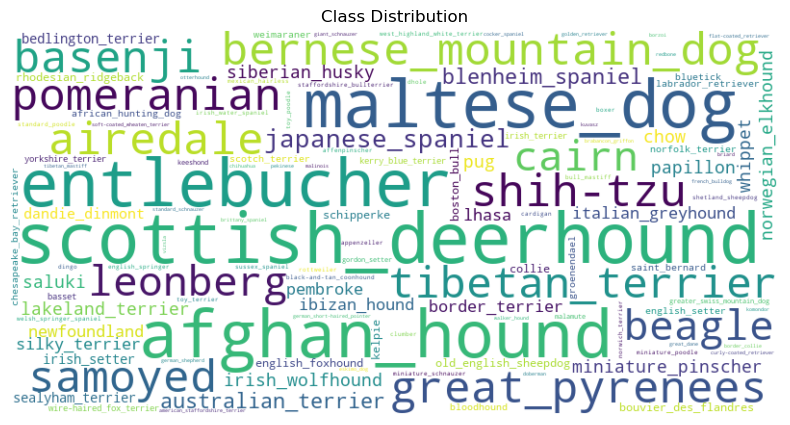

In [125]:
from wordcloud import WordCloud
class_distribution = labels['breed'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(class_distribution)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Class Distribution')
plt.show()


## Data Preprocessing

In [126]:
from transformers import ViTFeatureExtractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

/Users/krittinsetdhavanich/pytorch-test/torch_env/lib/python3.8/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [127]:
class CustomDataset(Dataset):
    def __init__(self, image_folder, csv_file, feature_extractor, label2id):
        self.image_folder = image_folder
        self.df = pd.read_csv(csv_file)
        self.feature_extractor = feature_extractor
        self.label2id = label2id
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        self.img_path = os.path.join(self.image_folder, self.df.iloc[idx, 0]+".jpg")
        self.img = Image.open(self.img_path).convert("RGB")
        self.label = self.label2id[self.df.iloc[idx, 1]]
        self.pixels = self.feature_extractor(images=self.img, return_tensors="pt")["pixel_values"].squeeze()
        return {
            "pixel_values": self.pixels,
            "label": self.label
        }
        


In [128]:
label2id= {label:ind for ind, label in enumerate(labels.breed.unique())}
id2label= {ind:label for ind, label in enumerate(labels.breed.unique())}
train_dataset = CustomDataset(image_folder="train", csv_file="labels.csv", feature_extractor=feature_extractor, label2id=label2id)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

valid_dataset = CustomDataset(image_folder="valid", csv_file="labels.csv", feature_extractor=feature_extractor, label2id=label2id)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)



In [129]:
batch = next(iter(train_loader))
batch["pixel_values"].shape, batch["label"].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [130]:
train_dataset[2]

{'pixel_values': tensor([[[-0.2078, -0.1294, -0.1216,  ..., -0.8118, -0.8745, -0.8980],
          [-0.2235, -0.1765, -0.1451,  ..., -0.7647, -0.8902, -0.9137],
          [-0.2627, -0.2784, -0.2078,  ..., -0.5686, -0.8510, -0.9059],
          ...,
          [ 0.5216,  0.4980,  0.5137,  ..., -0.0902, -0.0824, -0.1451],
          [ 0.5294,  0.5451,  0.5686,  ..., -0.1294, -0.1451, -0.0510],
          [ 0.5686,  0.5843,  0.5765,  ..., -0.1608, -0.1059, -0.1922]],
 
         [[-0.2157, -0.1373, -0.1294,  ..., -0.8980, -0.8824, -0.8824],
          [-0.2314, -0.1843, -0.1529,  ..., -0.8431, -0.8980, -0.9059],
          [-0.2706, -0.2863, -0.2157,  ..., -0.6471, -0.8667, -0.9059],
          ...,
          [ 0.5137,  0.4902,  0.5059,  ..., -0.0980, -0.0980, -0.1608],
          [ 0.5216,  0.5373,  0.5608,  ..., -0.1373, -0.1529, -0.0588],
          [ 0.5608,  0.5765,  0.5686,  ..., -0.1686, -0.1137, -0.1922]],
 
         [[-0.2549, -0.1765, -0.1686,  ..., -0.9059, -0.8902, -0.8902],
          [-

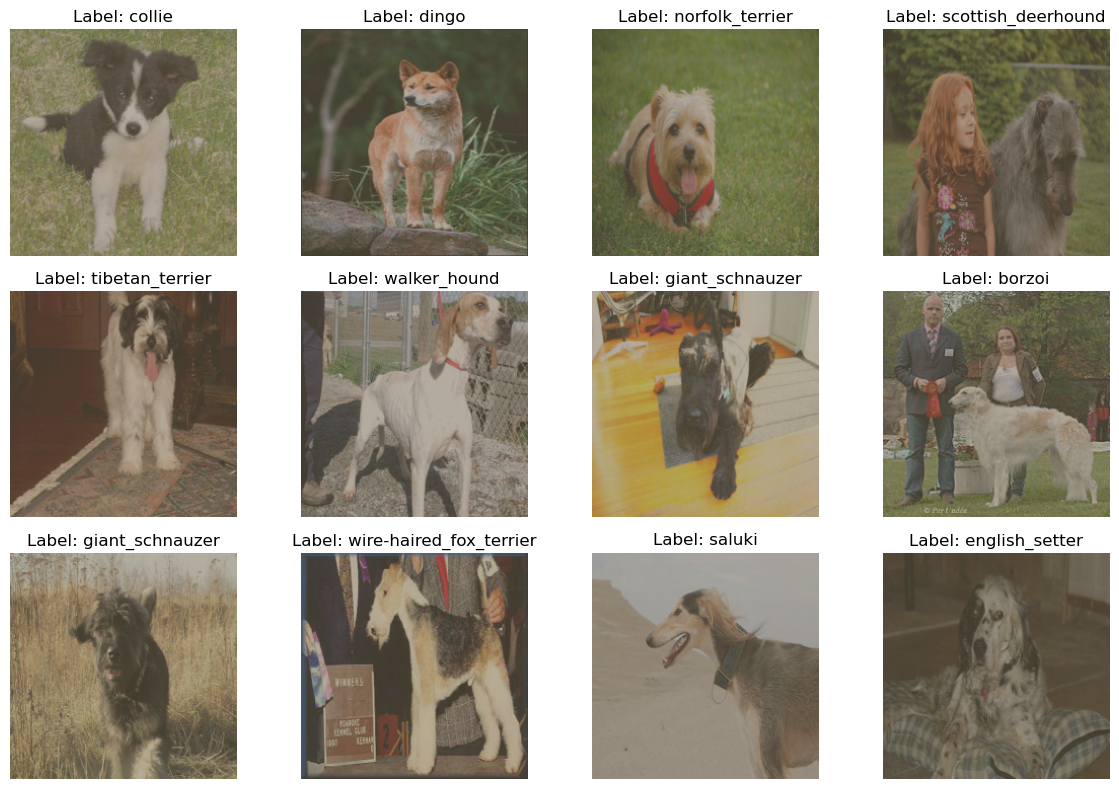

In [143]:
import matplotlib.pyplot as plt
import random
import torch

# Function to denormalize and convert tensor to numpy array
def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).to(dtype=torch.float32)
    std = torch.tensor([0.229, 0.224, 0.225]).to(dtype=torch.float32)
    tensor = tensor.squeeze().permute(1, 2, 0).to(dtype=torch.float32)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor.numpy()


# Initialize figure

def show_imgs(num:int = 12):
    # Loop to plot random samples
    plt.figure(figsize=(12, 8))
    for i in range(num):
        idx = random.randint(0, 120)  # Assuming you have more than 120 samples
        sample = train_dataset[idx]
        image = denormalize(sample["pixel_values"])
        label = id2label[sample["label"]]
        plt.subplot(3,4, i + 1) 
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    
show_imgs()


## Get a model

In [144]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

In [145]:
def process_example(example):
    inputs = processor(example['pixel_values'], return_tensors='pt')
    inputs['labels'] = example['label']
    return inputs

In [146]:
# Denormalize before processing
denormalized_image = denormalize(train_dataset[0]['pixel_values'])
denormalized_example = {'pixel_values': denormalized_image, 'label': train_dataset[0]['label']}

# Now process the example
process_example(denormalized_example)


{'pixel_values': tensor([[[[-0.9958, -0.9957, -0.9957,  ..., -0.9950, -0.9954, -0.9954],
          [-0.9957, -0.9959, -0.9957,  ..., -0.9947, -0.9950, -0.9953],
          [-0.9963, -0.9963, -0.9953,  ..., -0.9949, -0.9948, -0.9950],
          ...,
          [-0.9954, -0.9954, -0.9954,  ..., -0.9955, -0.9948, -0.9949],
          [-0.9954, -0.9954, -0.9953,  ..., -0.9958, -0.9951, -0.9950],
          [-0.9954, -0.9954, -0.9953,  ..., -0.9961, -0.9954, -0.9953]],

         [[-0.9969, -0.9967, -0.9966,  ..., -0.9956, -0.9960, -0.9960],
          [-0.9967, -0.9968, -0.9965,  ..., -0.9954, -0.9957, -0.9959],
          [-0.9971, -0.9970, -0.9960,  ..., -0.9956, -0.9955, -0.9957],
          ...,
          [-0.9966, -0.9966, -0.9965,  ..., -0.9965, -0.9958, -0.9959],
          [-0.9966, -0.9966, -0.9965,  ..., -0.9969, -0.9961, -0.9960],
          [-0.9966, -0.9966, -0.9965,  ..., -0.9972, -0.9964, -0.9962]],

         [[-0.9980, -0.9978, -0.9977,  ..., -0.9976, -0.9976, -0.9975],
          [-0